In [90]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [91]:
from bs4 import BeautifulSoup
import requests 

## : BJP has the highest number of seats

In [92]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL of the election results page
base_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult"

# State codes and names from the provided HTML
states = {
   "U01": "Andaman & Nicobar Islands", "S01": "Andhra Pradesh", "S02": "Arunachal Pradesh",
   "S03": "Assam", "S04": "Bihar", "U02": "Chandigarh", "S26": "Chhattisgarh",
   "U03": "Dadra & Nagar Haveli and Daman & Diu", "S05": "Goa", "S06": "Gujarat",
   "S07": "Haryana", "S08": "Himachal Pradesh", "U08": "Jammu and Kashmir", "S27": "Jharkhand",
   "S10": "Karnataka", "S11": "Kerala", "U09": "Ladakh", "U06": "Lakshadweep",
   "S12": "Madhya Pradesh", "S13": "Maharashtra", "S14": "Manipur", "S15": "Meghalaya",
   "S16": "Mizoram", "S17": "Nagaland", "U05": "NCT OF Delhi", "S18": "Odisha",
   "U07": "Puducherry", "S19": "Punjab", "S20": "Rajasthan", "S21": "Sikkim",
   "S22": "Tamil Nadu", "S29": "Telangana", "S23": "Tripura", "S24": "Uttar Pradesh",
   "S28": "Uttarakhand", "S25": "West Bengal"
}

# Function to scrape data for a given state code
def scrape_state_data(state_code):
    state_name = states[state_code]
    print(f"Fetching results for {state_name}...")
    # Construct the URL for the state
    url = f"{base_url}-{state_code}.htm"
    
    try:
        # Send a GET request
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for HTTP errors
        
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the table containing the results
        table = soup.find('table', {'class': 'table'})
        
        if table:
            # Extract table rows
            rows = []
            for row in table.find_all('tr'):
                cols = row.find_all('td')
                if len(cols) > 0:
                    # Extracting specific columns based on the example provided
                    party_name = cols[0].text.strip()
                    won = cols[1].text.strip()
                    leading = cols[2].text.strip()
                    total = cols[3].text.strip()
                    
                    # Append to rows list
                    rows.append([party_name, won, leading, total, state_name])
        
        else:
            print(f"No table found for {state_name}")
            return None
    
    except requests.exceptions.RequestException as e:
        print(f"Failed to retrieve data for {state_name}. Exception: {e}")
        return None
    
    # Create a DataFrame for the state's data
    df_state = pd.DataFrame(rows, columns=['Party', 'Won', 'Leading', 'Total', 'State'])
    return df_state

# Initialize an empty list to store all state DataFrames
all_results = []

# Iterate over each state and scrape data
for state_code in states.keys():
    df_state = scrape_state_data(state_code)
    if df_state is not None:
        all_results.append(df_state)

# Combine all state results into a single DataFrame
final_results = pd.concat(all_results, ignore_index=True)

# Save the DataFrame to a CSV file
final_results.to_csv('election_results_2024_all_states_combined.csv', index=False)

print("All state election results have been saved to election_results_2024_all_states_combined.csv")


Fetching results for Andaman & Nicobar Islands...
Fetching results for Andhra Pradesh...
Fetching results for Arunachal Pradesh...
Fetching results for Assam...
Fetching results for Bihar...
Fetching results for Chandigarh...
Fetching results for Chhattisgarh...
Fetching results for Dadra & Nagar Haveli and Daman & Diu...
Fetching results for Goa...
Fetching results for Gujarat...
Fetching results for Haryana...
Fetching results for Himachal Pradesh...
Fetching results for Jammu and Kashmir...
Fetching results for Jharkhand...
Fetching results for Karnataka...
Fetching results for Kerala...
Fetching results for Ladakh...
Fetching results for Lakshadweep...
Fetching results for Madhya Pradesh...
Fetching results for Maharashtra...
Fetching results for Manipur...
Fetching results for Meghalaya...
Fetching results for Mizoram...
Fetching results for Nagaland...
Fetching results for NCT OF Delhi...
Fetching results for Odisha...
Fetching results for Puducherry...
Fetching results for Punja

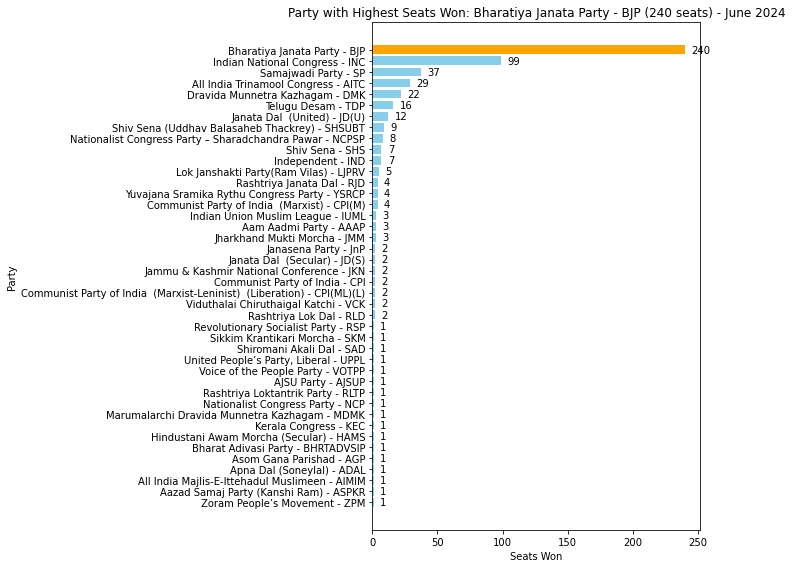

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined election results CSV file
final_results = pd.read_csv('election_results_2024_all_states_combined.csv')

# Group by Party and sum the 'Won' seats to find the party with the highest seats won
party_wise_results = final_results.groupby('Party')['Won'].sum().sort_values(ascending=False)

# Select the top party with the highest seats won
top_party = party_wise_results.idxmax()
top_party_seats = party_wise_results.max()

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
colors = ['skyblue' if party != top_party else 'orange' for party in party_wise_results.index]  # Highlight top party
plt.barh(party_wise_results.index, party_wise_results, color=colors)

# Adding annotations (number of seats won) to the bars
for index, value in enumerate(party_wise_results):
    plt.text(value + 5, index, str(value), va='center', fontsize=10)

# Adding labels and title
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.title(f'Party with Highest Seats Won: {top_party} ({top_party_seats} seats) - June 2024')

# Show plot
plt.gca().invert_yaxis()  # Invert y-axis to have highest party at the top
plt.tight_layout()
plt.show()


##

In [94]:
import requests
from bs4 import BeautifulSoup

# Constituency codes mapping
constituency_codes = {
    "S01": "S017", "S02": "S0113", "S03": "S0119", "S04": "S011", "S05": "S0115",
    "S06": "S0125", "S07": "S0110", "S08": "S0113", "S09": "S011", "S10": "S0115",
    "S11": "S0120", "S12": "S0121", "S13": "S016", "S14": "S0118", "S15": "S0111",
    "S16": "S0117", "S17": "S019", "S18": "S0114", "S19": "S0122", "S20": "S0116",
    "S21": "S018", "S22": "S0124", "S23": "S012", "S24": "S0123", "S25": "S0112",
    "S26": "S014", "S27": "S013", "S28": "S011", "S29": "S0113", "S30": "S0113",
    "S31": "S0113", "S32": "S0113", "S33": "S0113", "S34": "S0113", "S35": "S0113",
    "S36": "S0113", "S37": "S0113", "S38": "S0113", "S39": "S0113", "S40": "S0113",
    "S41": "S0113", "S42": "S0113", "S43": "S0113", "S44": "S0113", "S45": "S0113",
    "S46": "S0113", "S47": "S0113", "S48": "S0113", "S49": "S0113", "S50": "S0113",
    "S51": "S0113", "S52": "S0113", "S53": "S0113", "S54": "S0113", "S55": "S0113",
    "S56": "S0113", "S57": "S0113", "S58": "S0113", "S59": "S0113", "S60": "S0113"
}

# Base URL for scraping
base_url = "https://results.eci.gov.in/PcResultGenJune2024/Constituencywise{code}.htm"

# Iterate over each constituency code and scrape results
for key, value in constituency_codes.items():
    url = base_url.format(code=value)
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table', class_='table table-striped table-bordered')
        if table:
            rows = table.find_all('tr')
            for row in rows[1:-1]:  # Skip header and footer rows
                columns = row.find_all('td')
                sn = columns[0].text.strip()
                candidate = columns[1].text.strip()
                party = columns[2].text.strip()
                evm_votes = columns[3].text.strip()
                postal_votes = columns[4].text.strip()
                total_votes = columns[5].text.strip()
                percentage_votes = columns[6].text.strip()
                # Process or store the data as needed
                print(f"Constituency: {key}, Candidate: {candidate}, Party: {party}, Total Votes: {total_votes}")
        else:
            print(f"No table found for {key}")
    else:
        print(f"Failed to fetch data for {key}")



Constituency: S01, Candidate: G M HARISH (BALAYOGI), Party: Telugu Desam, Total Votes: 796981
Constituency: S01, Candidate: RAPAKA VARAPRASADA RAO, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 454785
Constituency: S01, Candidate: GOUTHAM JANGA, Party: Indian National Congress, Total Votes: 15082
Constituency: S01, Candidate: DORABABU YALLA, Party: Bahujan Samaj Party, Total Votes: 5388
Constituency: S01, Candidate: KATRU NAGA BABU, Party: Telugu Nava Garjana Party, Total Votes: 3741
Constituency: S01, Candidate: VADDI LALITH KUMAR, Party: Independent, Total Votes: 2977
Constituency: S01, Candidate: MAKEY DAVY PRASAD, Party: Independent, Total Votes: 2111
Constituency: S01, Candidate: GUDE VENKATESWARULU, Party: Independent, Total Votes: 1745
Constituency: S01, Candidate: RAMESH JILLELLA, Party: Jatiya Jana Sena Party, Total Votes: 872
Constituency: S01, Candidate: YALANGI RAMESH, Party: Jaibhim Rao Bharat Party, Total Votes: 740
Constituency: S01, Candidate: MATHA KRISHNA

Constituency: S06, Candidate: DAGGUMALLA PRASADA RAO, Party: Telugu Desam, Total Votes: 778071
Constituency: S06, Candidate: REDDEPPA.N ., Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 557592
Constituency: S06, Candidate: MOTUKUR JAGAPATHI, Party: Indian National Congress, Total Votes: 30150
Constituency: S06, Candidate: THOGURU VIJAYA KUMAR, Party: Bahujan Samaj Party, Total Votes: 13511
Constituency: S06, Candidate: YUGANDAR . KONDA, Party: Independent, Total Votes: 6973
Constituency: S06, Candidate: K.MUNI KRISHNA, Party: Independent, Total Votes: 3956
Constituency: S06, Candidate: P.JANAKI RAMA RAO ( BABU), Party: National Maha Sabha Party, Total Votes: 2833
Constituency: S06, Candidate: PETA.MOHAN ., Party: Independent, Total Votes: 2366
Constituency: S06, Candidate: C.SUDHAKAR, Party: Independent, Total Votes: 1935
Constituency: S06, Candidate: N.CHANDRABABU, Party: Independent, Total Votes: 1885
Constituency: S06, Candidate: MADASI SUDHARSHAN, Party: Independent, To

Constituency: S11, Candidate: B K PARTHASARATHI, Party: Telugu Desam, Total Votes: 725534
Constituency: S11, Candidate: J SHANTHA, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 593107
Constituency: S11, Candidate: B A SAMAD SHAHEEN, Party: Indian National Congress, Total Votes: 55059
Constituency: S11, Candidate: BHAGYA R S, Party: Bahujan Samaj Party, Total Votes: 8015
Constituency: S11, Candidate: PRATHAP REDDY GORLA, Party: Independent, Total Votes: 5444
Constituency: S11, Candidate: H D HANUMANTHE GOWD, Party: Independent, Total Votes: 2278
Constituency: S11, Candidate: ANJINAPPA GARI SREENIVASULU, Party: Revolutionary Socialist Party, Total Votes: 2051
Constituency: S11, Candidate: S N SURESH, Party: Independent, Total Votes: 1631
Constituency: S11, Candidate: DASAGANIPALLI KULLAYAPPA, Party: Independent, Total Votes: 1328
Constituency: S11, Candidate: ASHOK, Party: Socialist Unity Centre Of India (COMMUNIST), Total Votes: 1292
Constituency: S11, Candidate: T SUDHAKAR

Constituency: S17, Candidate: BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA), Party: Bharatiya Janata Party, Total Votes: 707343
Constituency: S17, Candidate: UMABALA GUDURI, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 430541
Constituency: S17, Candidate: K.B.R.NAIDU, Party: Indian National Congress, Total Votes: 35213
Constituency: S17, Candidate: PRASANNA KUMAR UNDURTHI, Party: Independent, Total Votes: 6364
Constituency: S17, Candidate: MEDAPATI VENKATA VARAHALA REDDY, Party: Independent, Total Votes: 5969
Constituency: S17, Candidate: SIRRA RAJU, Party: Bahujan Samaj Party, Total Votes: 6014
Constituency: S17, Candidate: BALAGAM NAYAKAR, Party: Independent, Total Votes: 5240
Constituency: S17, Candidate: NALLI RAJESH, Party: Independent, Total Votes: 4684
Constituency: S17, Candidate: KETHA SREENU, Party: Independent, Total Votes: 3145
Constituency: S17, Candidate: OLETY NAGENDRA KRISHNA, Party: Jaibhim Rao Bharat Party, Total Votes: 3116
Constituency: S17, Candidate: A

Constituency: S22, Candidate: P V MIDHUN REDDY, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 644844
Constituency: S22, Candidate: NALLARI KIRAN KUMAR REDDY, Party: Bharatiya Janata Party, Total Votes: 568773
Constituency: S22, Candidate: SHAIK BASHEED, Party: Indian National Congress, Total Votes: 53300
Constituency: S22, Candidate: ABBAVARAM UGENDRA, Party: Bahujan Samaj Party, Total Votes: 12363
Constituency: S22, Candidate: POOLA REDDY SEKHAR, Party: Independent, Total Votes: 6100
Constituency: S22, Candidate: NAGARAJU JETTI, Party: Independent, Total Votes: 5999
Constituency: S22, Candidate: PRADEEP PENAMADU, Party: All India Forward Bloc, Total Votes: 5672
Constituency: S22, Candidate: CHOUDVARAM SUBBANARASAIAH, Party: Independent, Total Votes: 4735
Constituency: S22, Candidate: PULI SREENIVASULU, Party: Independent, Total Votes: 4616
Constituency: S22, Candidate: SREENIVASULU MARRIPATI, Party: Independent, Total Votes: 4443
Constituency: S22, Candidate: AKBAR M BASH

Constituency: S27, Candidate: APPALANAIDU KALISETTI, Party: Telugu Desam, Total Votes: 743113
Constituency: S27, Candidate: BELLANA CHANDRASEKHAR, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 493762
Constituency: S27, Candidate: BOBBILI SRINU, Party: Indian National Congress, Total Votes: 10623
Constituency: S27, Candidate: PEERUBANDI PRAKASH RAO, Party: Bahujan Samaj Party, Total Votes: 8038
Constituency: S27, Candidate: VELURI VENKATA TRINADHARAO, Party: Independent, Total Votes: 4152
Constituency: S27, Candidate: ALLU SRIRAMULU, Party: Independent, Total Votes: 3401
Constituency: S27, Candidate: SIYYADULA YELLA RAO, Party: Independent, Total Votes: 3107
Constituency: S27, Candidate: SRINIVASA RAO SAMBHANA, Party: Yuga Thulasi Party, Total Votes: 1761
Constituency: S27, Candidate: MARISERLA KRISHNAMURTHY NAIDU, Party: Independent, Total Votes: 1629
Constituency: S27, Candidate: VANGAPANDU MAHESWARA RAO, Party: Naba Bharata Nirmana Seva Party, Total Votes: 1553
Constitue

Constituency: S31, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S31, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S31, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S31, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S31, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S31, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S31, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S31, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S31, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S31, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S34, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S34, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S34, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S34, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S34, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S34, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S34, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S34, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S34, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S34, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S38, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S38, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S38, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S38, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S38, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S38, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S38, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S38, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S38, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S38, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S41, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S41, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S41, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S41, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S41, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S41, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S41, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S41, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S41, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S41, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S45, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S45, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S45, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S45, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S45, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S45, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S45, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S45, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S45, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S45, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S49, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S49, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S49, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S49, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S49, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S49, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S49, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S49, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S49, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S49, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S53, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S53, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S53, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S53, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S53, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S53, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S53, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S53, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S53, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S53, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S57, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S57, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S57, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S57, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S57, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S57, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S57, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S57, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S57, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S57, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

In [95]:
import requests
from bs4 import BeautifulSoup

# Constituency codes mapping
constituency_codes = {
    "S01": "S017", "S02": "S0113", "S03": "S0119", "S04": "S011", "S05": "S0115",
    "S06": "S0125", "S07": "S0110", "S08": "S0113", "S09": "S011", "S10": "S0115",
    "S11": "S0120", "S12": "S0121", "S13": "S016", "S14": "S0118", "S15": "S0111",
    "S16": "S0117", "S17": "S019", "S18": "S0114", "S19": "S0122", "S20": "S0116",
    "S21": "S018", "S22": "S0124", "S23": "S012", "S24": "S0123", "S25": "S0112",
    "S26": "S014", "S27": "S013", "S28": "S011", "S29": "S0113", "S30": "S0113",
    "S31": "S0113", "S32": "S0113", "S33": "S0113", "S34": "S0113", "S35": "S0113",
    "S36": "S0113", "S37": "S0113", "S38": "S0113", "S39": "S0113", "S40": "S0113",
    "S41": "S0113", "S42": "S0113", "S43": "S0113", "S44": "S0113", "S45": "S0113",
    "S46": "S0113", "S47": "S0113", "S48": "S0113", "S49": "S0113", "S50": "S0113",
    "S51": "S0113", "S52": "S0113", "S53": "S0113", "S54": "S0113", "S55": "S0113",
    "S56": "S0113", "S57": "S0113", "S58": "S0113", "S59": "S0113", "S60": "S0113"
}

# Base URL for scraping
base_url = "https://results.eci.gov.in/PcResultGenJune2024/Constituencywise{code}.htm"

# Iterate over each constituency code and scrape results
for key, value in constituency_codes.items():
    url = base_url.format(code=value)
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table', class_='table table-striped table-bordered')
        if table:
            rows = table.find_all('tr')
            for row in rows[1:-1]:  # Skip header and footer rows
                columns = row.find_all('td')
                sn = columns[0].text.strip()
                candidate = columns[1].text.strip()
                party = columns[2].text.strip()
                evm_votes = columns[3].text.strip()
                postal_votes = columns[4].text.strip()
                total_votes = columns[5].text.strip()
                percentage_votes = columns[6].text.strip()
                # Process or store the data as needed
                print(f"Constituency: {key}, Candidate: {candidate}, Party: {party}, Total Votes: {total_votes}")
        else:
            print(f"No table found for {key}")
    else:
        print(f"Failed to fetch data for {key}")



Constituency: S01, Candidate: G M HARISH (BALAYOGI), Party: Telugu Desam, Total Votes: 796981
Constituency: S01, Candidate: RAPAKA VARAPRASADA RAO, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 454785
Constituency: S01, Candidate: GOUTHAM JANGA, Party: Indian National Congress, Total Votes: 15082
Constituency: S01, Candidate: DORABABU YALLA, Party: Bahujan Samaj Party, Total Votes: 5388
Constituency: S01, Candidate: KATRU NAGA BABU, Party: Telugu Nava Garjana Party, Total Votes: 3741
Constituency: S01, Candidate: VADDI LALITH KUMAR, Party: Independent, Total Votes: 2977
Constituency: S01, Candidate: MAKEY DAVY PRASAD, Party: Independent, Total Votes: 2111
Constituency: S01, Candidate: GUDE VENKATESWARULU, Party: Independent, Total Votes: 1745
Constituency: S01, Candidate: RAMESH JILLELLA, Party: Jatiya Jana Sena Party, Total Votes: 872
Constituency: S01, Candidate: YALANGI RAMESH, Party: Jaibhim Rao Bharat Party, Total Votes: 740
Constituency: S01, Candidate: MATHA KRISHNA

Constituency: S07, Candidate: PUTTA MAHESH KUMAR, Party: Telugu Desam, Total Votes: 746351
Constituency: S07, Candidate: KARUMURI SUNIL KUMAR, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 564494
Constituency: S07, Candidate: KAVURI LAVANYA, Party: Indian National Congress, Total Votes: 20826
Constituency: S07, Candidate: AJAY BABU BODA, Party: Navarang Congress Party, Total Votes: 12210
Constituency: S07, Candidate: NITTA AKHILA DHARANI PAL, Party: Bahujan Samaj Party, Total Votes: 6732
Constituency: S07, Candidate: BOKINALA KOTESWARA RAO, Party: Independent, Total Votes: 2263
Constituency: S07, Candidate: RUDRAPAKA RATNA RAO (R.R.R), Party: Andhra Rastra Praja Samithi, Total Votes: 1526
Constituency: S07, Candidate: KANDAVALLI JEEVA DEVA DAYAKAR, Party: Independent, Total Votes: 1180
Constituency: S07, Candidate: AGASTEEN KOMMINA, Party: Independent, Total Votes: 1004
Constituency: S07, Candidate: DR. MENDEM SANTHOSH KUMAR (PEDDA BABULU), Party: Liberation Congress Party

Constituency: S13, Candidate: TANGELLA UDAY SRINIVAS  (TEA TIME UDAY), Party: Janasena Party, Total Votes: 729699
Constituency: S13, Candidate: CHALAMALASETTY SUNIL, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 500208
Constituency: S13, Candidate: MALLIPUDI MANGAPATI PALLAM RAJU, Party: Indian National Congress, Total Votes: 21109
Constituency: S13, Candidate: UDAY, Party: Navarang Congress Party, Total Votes: 15703
Constituency: S13, Candidate: KANDREGULA NARASIMHAM, Party: Bahujan Samaj Party, Total Votes: 11979
Constituency: S13, Candidate: DR ANUSHA YADAV, Party: Bharatha Chaitanya Yuvajana Party, Total Votes: 9854
Constituency: S13, Candidate: TANGELLA SRINIVASU, Party: Jatiya Jana Sena Party, Total Votes: 6559
Constituency: S13, Candidate: YEDIDA VARA PRASAD KUMAR, Party: Republican Party of India (A), Total Votes: 3927
Constituency: S13, Candidate: BUGATHA BANGARRAO, Party: Communist Party of India  (Marxist-Leninist)  (Liberation), Total Votes: 2823
Constituency: 

Constituency: S18, Candidate: LAVU SRIKRISHNA DEVARAYALU, Party: Telugu Desam, Total Votes: 807996
Constituency: S18, Candidate: ANIL KUMAR POLUBOINA, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 648267
Constituency: S18, Candidate: GARNEPUDI ALEXANDER SUDHAKAR, Party: Indian National Congress, Total Votes: 18046
Constituency: S18, Candidate: ORSU PREMARAJU, Party: Bahujan Samaj Party, Total Votes: 5309
Constituency: S18, Candidate: KUCHIPUDI JOHN BABU, Party: Jaibhim Rao Bharat Party, Total Votes: 2336
Constituency: S18, Candidate: GARLAPATI SUBHASH PREM, Party: Revolutionary Socialist Party, Total Votes: 1245
Constituency: S18, Candidate: YAMPATI VEERANJANEYA REDDY, Party: Independent, Total Votes: 1057
Constituency: S18, Candidate: SUBBARAO CHALLA, Party: Independent, Total Votes: 1051
Constituency: S18, Candidate: ABDUL RAJAK SHAIK, Party: Independent, Total Votes: 723
Constituency: S18, Candidate: KOTA POTHURAJU, Party: Pyramid Party of India, Total Votes: 670
Consti

Constituency: S24, Candidate: GURUMOORTHY MADDILA, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 632228
Constituency: S24, Candidate: VARA PRASAD RAO VELAGAPALLI, Party: Bharatiya Janata Party, Total Votes: 617659
Constituency: S24, Candidate: CHINTA MOHAN, Party: Indian National Congress, Total Votes: 65523
Constituency: S24, Candidate: PENUMURU. GURAPPA, Party: Bahujan Samaj Party, Total Votes: 10506
Constituency: S24, Candidate: KATTAMANCHI. PRABHAKAR, Party: Independent, Total Votes: 5802
Constituency: S24, Candidate: M UMADEVI, Party: Janata Congress, Total Votes: 5425
Constituency: S24, Candidate: ALLAM.RAJA, Party: Independent, Total Votes: 4970
Constituency: S24, Candidate: VIJAY KUMAR G.SRKR, Party: Liberation Congress Party, Total Votes: 4302
Constituency: S24, Candidate: ANJAIAH.P, Party: Republican Party of India (A), Total Votes: 3666
Constituency: S24, Candidate: V.C. NAVEEN GUPTA, Party: Independent, Total Votes: 1731
Constituency: S24, Candidate: A. VARAPRA

Constituency: S28, Candidate: GUMMA THANUJA RANI, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 477005
Constituency: S28, Candidate: KOTHAPALLI GEETHA, Party: Bharatiya Janata Party, Total Votes: 426425
Constituency: S28, Candidate: APPALANARASA PACHIPENTA, Party: Communist Party of India  (Marxist), Total Votes: 123129
Constituency: S28, Candidate: AVASHYA LAHARI . VARAM, Party: Bahujan Samaj Party, Total Votes: 25750
Constituency: S28, Candidate: SAMAREDDY BALAKRISHNA, Party: Independent, Total Votes: 9535
Constituency: S28, Candidate: NIMMAKA JAYARAJU, Party: Independent, Total Votes: 9462
Constituency: S28, Candidate: ATHIDHI, Party: Independent, Total Votes: 8136
Constituency: S28, Candidate: CHANTI BADNAINA, Party: Jai Bharat National Party, Total Votes: 7252
Constituency: S28, Candidate: MOTTADAM . RAJABABU, Party: Bharat Adivasi Party, Total Votes: 6766
Constituency: S28, Candidate: RANJITH KUMAR PALAKA, Party: Independent, Total Votes: 6047
Constituency: S28, Cand

Constituency: S32, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S32, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S32, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S32, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S32, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S32, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S32, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S32, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S32, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S32, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S36, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S36, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S36, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S36, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S36, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S36, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S36, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S36, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S36, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S36, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S40, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S40, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S40, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S40, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S40, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S40, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S40, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S40, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S40, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S40, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S44, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S44, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S44, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S44, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S44, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S44, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S44, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S44, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S44, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S44, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S47, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S47, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S47, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S47, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S47, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S47, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S47, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S47, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S47, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S47, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S51, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S51, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S51, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S51, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S51, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S51, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S51, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S51, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S51, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S51, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S55, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S55, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S55, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S55, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S55, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S55, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S55, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S55, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S55, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S55, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

Constituency: S59, Candidate: DR CHANDRA SEKHAR PEMMASANI, Party: Telugu Desam, Total Votes: 864948
Constituency: S59, Candidate: KILARI VENKATA ROSAIAH, Party: Yuvajana Sramika Rythu Congress Party, Total Votes: 520253
Constituency: S59, Candidate: JANGALA AJAY KUMAR, Party: Communist Party of India, Total Votes: 8637
Constituency: S59, Candidate: SIVAREDDY. ENDREDDY, Party: Navataram Party, Total Votes: 5629
Constituency: S59, Candidate: TENALI PRAKASH, Party: Bahujan Samaj Party, Total Votes: 4272
Constituency: S59, Candidate: SIKHAKOLLI HEMA GOWRI SHANKAR, Party: Jatiya Jana Sena Party, Total Votes: 1964
Constituency: S59, Candidate: SAMUDRALA CHINNA KOTAIAH, Party: Jaibhim Rao Bharat Party, Total Votes: 1753
Constituency: S59, Candidate: UMAR BHASHA SHAIK, Party: Jana Sahayaka Sakthi, Total Votes: 1275
Constituency: S59, Candidate: SYED. SAIDA, Party: Navarang Congress Party, Total Votes: 1222
Constituency: S59, Candidate: AMBATI CHALAMAIAH, Party: Pyramid Party of India, Total Vo

## : Dominance in Uttar Pradesh: The Samajwadi Party (SP) emerged as the leading party in Uttar Pradesh, winning 37 seats, followed by the Bharatiya Janata Party (BJP) with 33 seats. The Indian National Congress (INC) managed to secure 6 seats​ (ECI Official)​.


In [96]:
import requests
from bs4 import BeautifulSoup

# Base URL for fetching constituency results
base_url = "https://results.eci.gov.in/PcResultGenJune2024/Constituencywise"

# Constituency codes for Uttar Pradesh
constituency_codes = {
    "Agra - 18": "S2418", "Akbarpur - 44": "S2444", "Aligarh - 15": "S2415", "Allahabad - 52": "S2452",
    "Ambedkar Nagar - 55": "S2455", "Amethi - 37": "S2437", "Amroha - 9": "S249", "Aonla - 24": "S2424",
    "Azamgarh - 69": "S2469", "Badaun - 23": "S2423", "Baghpat - 11": "S2411", "Baharaich - 56": "S2456",
    "Ballia - 72": "S2472", "Banda - 48": "S2448", "Bansgaon - 67": "S2467", "Barabanki - 53": "S2453",
    "Bareilly - 25": "S2425", "Basti - 61": "S2461", "Bhadohi - 78": "S2478", "Bijnor - 4": "S244",
    "Bulandshahr - 14": "S2414", "Chandauli - 76": "S2476", "Deoria - 66": "S2466", "Dhaurahra - 29": "S2429",
    "Domariyaganj - 60": "S2460", "Etah - 22": "S2422", "Etawah - 41": "S2441", "Faizabad - 54": "S2454",
    "Farrukhabad - 40": "S2440", "Fatehpur - 49": "S2449", "Fatehpur Sikri - 19": "S2419", "Firozabad - 20": "S2420",
    "Gautam Buddha Nagar - 13": "S2413", "Ghaziabad - 12": "S2412", "Ghazipur - 75": "S2475", "Ghosi - 70": "S2470",
    "Gonda - 59": "S2459", "Gorakhpur - 64": "S2464", "Hamirpur - 47": "S2447", "Hardoi - 31": "S2431",
    "Hathras - 16": "S2416", "Jalaun - 45": "S2445", "Jaunpur - 73": "S2473", "Jhansi - 46": "S2446",
    "Kairana - 2": "S242", "Kaiserganj - 57": "S2457", "Kannauj - 42": "S2442", "Kanpur - 43": "S2443",
    "Kaushambi - 50": "S2450", "Kheri - 28": "S2428", "Kushi Nagar - 65": "S2465", "Lalganj - 68": "S2468",
    "Lucknow - 35": "S2435", "Machhlishahr - 74": "S2474", "Maharajganj - 63": "S2463", "Mainpuri - 21": "S2421",
    "Mathura - 17": "S2417", "Meerut - 10": "S2410", "Mirzapur - 79": "S2479", "Misrikh - 32": "S2432",
    "Mohanlalganj - 34": "S2434", "Moradabad - 6": "S246", "Muzaffarnagar - 3": "S243", "Nagina - 5": "S245",
    "Phulpur - 51": "S2451", "Pilibhit - 26": "S2426", "Pratapgarh - 39": "S2439", "Rae Bareli - 36": "S2436",
    "Rampur - 7": "S247", "Robertsganj - 80": "S2480", "Saharanpur - 1": "S241", "Salempur - 71": "S2471",
    "Sambhal - 8": "S248", "Sant Kabir Nagar - 62": "S2462", "Shahjahanpur - 27": "S2427", "Shrawasti - 58": "S2458",
    "Sitapur - 30": "S2430", "Sultanpur - 38": "S2438", "Unnao - 33": "S2433", "Varanasi - 77": "S2477"
}

# Function to scrape election results for a constituency
def scrape_constituency_results(constituency_code):
    # Construct the URL for the constituency
    constituency_url = f"{base_url}{constituency_code}.htm"
    
    # Make a GET request to the URL
    response = requests.get(constituency_url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract constituency name
        title_element = soup.find('h2')
        if title_element:
            constituency_name = title_element.text.strip().split('-')[0].strip()
            state_name = title_element.find('strong').text.strip('()')
        
        # Extract table data
        table = soup.find('table', {'class': 'table table-striped table-bordered'})
        if table:
            rows = table.find_all('tr')
            results = []
            for row in rows[1:-1]:  # skip header and footer rows
                cols = row.find_all('td')
                if len(cols) >= 7:
                    serial_number = cols[0].text.strip()
                    candidate_name = cols[1].text.strip()
                    party_name = cols[2].text.strip()
                    evm_votes = cols[3].text.strip()
                    postal_votes = cols[4].text.strip()
                    total_votes = cols[5].text.strip()
                    percentage_votes = cols[6].text.strip()
                    
                    results.append({
                        'Serial Number': serial_number,
                        'Candidate Name': candidate_name,
                        'Party': party_name,
                        'EVM Votes': evm_votes,
                        'Postal Votes': postal_votes,
                        'Total Votes': total_votes,
                        '% of Votes': percentage_votes
                    })
            
            return constituency_name, state_name, results
        else:
            print(f"No table found for {constituency_name}")
    else:
        print(f"Failed to fetch data for {constituency_code}, Status Code: {response.status_code}")

# Example usage:
for constituency_name, constituency_code in constituency_codes.items():
    print(f"Fetching results for {constituency_name} ({constituency_code})...")
    name, state, results = scrape_constituency_results(constituency_code)
    if results:
        print(f"Constituency Name: {name}")
        print(f"State Name: {state}")
        print("Results:")
        for result in results:
            print(result)
        print("\n")


Fetching results for Agra - 18 (S2418)...
Constituency Name: Parliamentary  Constituency  18
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'PROF S P SINGH BAGHEL', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '597061', 'Postal Votes': '2336', 'Total Votes': '599397', '% of Votes': '53.34'}
{'Serial Number': '2', 'Candidate Name': 'SURESH CHAND KARDAM', 'Party': 'Samajwadi Party', 'EVM Votes': '326644', 'Postal Votes': '1459', 'Total Votes': '328103', '% of Votes': '29.2'}
{'Serial Number': '3', 'Candidate Name': 'POOJA AMROHI', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '175810', 'Postal Votes': '664', 'Total Votes': '176474', '% of Votes': '15.7'}
{'Serial Number': '4', 'Candidate Name': 'ARAM SINGH', 'Party': 'Peoples Party of India (Democratic)', 'EVM Votes': '4130', 'Postal Votes': '13', 'Total Votes': '4143', '% of Votes': '0.37'}
{'Serial Number': '5', 'Candidate Name': 'KULDEEP KUMAR', 'Party': 'Bharatiya Kisan Parivartan Party', 'EVM Votes':

Constituency Name: Parliamentary  Constituency  55
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'LALJI VERMA', 'Party': 'Samajwadi Party', 'EVM Votes': '543721', 'Postal Votes': '1238', 'Total Votes': '544959', '% of Votes': '46.3'}
{'Serial Number': '2', 'Candidate Name': 'RITESH PANDEY', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '406851', 'Postal Votes': '861', 'Total Votes': '407712', '% of Votes': '34.64'}
{'Serial Number': '3', 'Candidate Name': 'QAMAR HAYAT', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '199252', 'Postal Votes': '247', 'Total Votes': '199499', '% of Votes': '16.95'}
{'Serial Number': '4', 'Candidate Name': 'NEELAM SINGH', 'Party': 'Moolniwasi Samaj Party', 'EVM Votes': '4321', 'Postal Votes': '10', 'Total Votes': '4331', '% of Votes': '0.37'}
{'Serial Number': '5', 'Candidate Name': 'SHABANA KHATOON', 'Party': 'Peace Party', 'EVM Votes': '3983', 'Postal Votes': '7', 'Total Votes': '3990', '% of Votes': '0.34'}
{'Serial Numbe

Constituency Name: Parliamentary  Constituency  69
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'DHARMENDRA YADAV', 'Party': 'Samajwadi Party', 'EVM Votes': '504837', 'Postal Votes': '3402', 'Total Votes': '508239', '% of Votes': '48.2'}
{'Serial Number': '2', 'Candidate Name': 'DINESH LAL YADAV “NIRAHUA”', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '345725', 'Postal Votes': '1479', 'Total Votes': '347204', '% of Votes': '32.93'}
{'Serial Number': '3', 'Candidate Name': 'MASHHOD SABEEHA ANSARI', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '179189', 'Postal Votes': '650', 'Total Votes': '179839', '% of Votes': '17.05'}
{'Serial Number': '4', 'Candidate Name': 'RAVINDRA NATH SHARMA', 'Party': 'Moulik Adhikar Party', 'EVM Votes': '3038', 'Postal Votes': '4', 'Total Votes': '3042', '% of Votes': '0.29'}
{'Serial Number': '5', 'Candidate Name': 'PARAS YADAV', 'Party': 'Jan Raajya Party', 'EVM Votes': '2489', 'Postal Votes': '2', 'Total Votes': '2491', 

Constituency Name: Parliamentary  Constituency  48
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'KRISHNA DEVI SHIVSHANKER PATEL', 'Party': 'Samajwadi Party', 'EVM Votes': '406018', 'Postal Votes': '549', 'Total Votes': '406567', '% of Votes': '38.94'}
{'Serial Number': '2', 'Candidate Name': 'R. K. SINGH PATEL', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '334950', 'Postal Votes': '407', 'Total Votes': '335357', '% of Votes': '32.12'}
{'Serial Number': '3', 'Candidate Name': 'MAYANK DWIVEDI', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '245530', 'Postal Votes': '215', 'Total Votes': '245745', '% of Votes': '23.54'}
{'Serial Number': '4', 'Candidate Name': 'RAMCHANDRA SARAS', 'Party': 'Communist Party of India', 'EVM Votes': '9436', 'Postal Votes': '2', 'Total Votes': '9438', '% of Votes': '0.9'}
{'Serial Number': '5', 'Candidate Name': 'PANCHA URF PANCHAMLAL', 'Party': 'Bhagidari Party(P)', 'EVM Votes': '7714', 'Postal Votes': '3', 'Total Votes': '

Constituency Name: Parliamentary  Constituency  61
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'RAM PRASAD CHAUDHARY', 'Party': 'Samajwadi Party', 'EVM Votes': '523487', 'Postal Votes': '3518', 'Total Votes': '527005', '% of Votes': '48.67'}
{'Serial Number': '2', 'Candidate Name': 'HARISH CHANDRA ALIAS HARISH DWIVEDI', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '424604', 'Postal Votes': '1407', 'Total Votes': '426011', '% of Votes': '39.34'}
{'Serial Number': '3', 'Candidate Name': 'LAVKUSH PATEL', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '102818', 'Postal Votes': '483', 'Total Votes': '103301', '% of Votes': '9.54'}
{'Serial Number': '4', 'Candidate Name': 'PANKAJ DUBEY', 'Party': 'Log Party', 'EVM Votes': '4624', 'Postal Votes': '3', 'Total Votes': '4627', '% of Votes': '0.43'}
{'Serial Number': '5', 'Candidate Name': 'PREM KUMAR', 'Party': 'Moulik Adhikar Party', 'EVM Votes': '3607', 'Postal Votes': '4', 'Total Votes': '3611', '% of Votes'

Constituency Name: Parliamentary  Constituency  66
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'SHASHANK MANI', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '503509', 'Postal Votes': '1032', 'Total Votes': '504541', '% of Votes': '48.36'}
{'Serial Number': '2', 'Candidate Name': 'AKHILESH PRATAP SINGH', 'Party': 'Indian National Congress', 'EVM Votes': '467946', 'Postal Votes': '1753', 'Total Votes': '469699', '% of Votes': '45.02'}
{'Serial Number': '3', 'Candidate Name': 'SANDESH', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '45446', 'Postal Votes': '118', 'Total Votes': '45564', '% of Votes': '4.37'}
{'Serial Number': '4', 'Candidate Name': 'SATENDER KUMAR MALL', 'Party': 'Independent', 'EVM Votes': '4149', 'Postal Votes': '9', 'Total Votes': '4158', '% of Votes': '0.4'}
{'Serial Number': '5', 'Candidate Name': 'MUKTINATH SINGH', 'Party': 'Janta Samta Party', 'EVM Votes': '3261', 'Postal Votes': '3', 'Total Votes': '3264', '% of Votes': '0.31'}


Constituency Name: Parliamentary  Constituency  54
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'AWADHESH PRASAD', 'Party': 'Samajwadi Party', 'EVM Votes': '553549', 'Postal Votes': '740', 'Total Votes': '554289', '% of Votes': '48.59'}
{'Serial Number': '2', 'Candidate Name': 'LALLU SINGH', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '499002', 'Postal Votes': '720', 'Total Votes': '499722', '% of Votes': '43.81'}
{'Serial Number': '3', 'Candidate Name': 'SACHIDANAND PANDEY', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '46347', 'Postal Votes': '60', 'Total Votes': '46407', '% of Votes': '4.07'}
{'Serial Number': '4', 'Candidate Name': 'ARVIND SEN', 'Party': 'Communist Party of India', 'EVM Votes': '15353', 'Postal Votes': '14', 'Total Votes': '15367', '% of Votes': '1.35'}
{'Serial Number': '5', 'Candidate Name': 'SUNIL KUMAR BHATT', 'Party': 'Independent', 'EVM Votes': '3826', 'Postal Votes': '1', 'Total Votes': '3827', '% of Votes': '0.34'}
{'Ser

Constituency Name: Parliamentary  Constituency  20
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'AKSHAYA YADAV', 'Party': 'Samajwadi Party', 'EVM Votes': '541861', 'Postal Votes': '1176', 'Total Votes': '543037', '% of Votes': '49.04'}
{'Serial Number': '2', 'Candidate Name': 'VISHWADEEP SINGH', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '452946', 'Postal Votes': '779', 'Total Votes': '453725', '% of Votes': '40.98'}
{'Serial Number': '3', 'Candidate Name': 'CHOWDHARY BASHEER', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '90849', 'Postal Votes': '99', 'Total Votes': '90948', '% of Votes': '8.21'}
{'Serial Number': '4', 'Candidate Name': 'UPENDRA SINGH', 'Party': 'Bharatiya Kisan Parivartan Party', 'EVM Votes': '7111', 'Postal Votes': '8', 'Total Votes': '7119', '% of Votes': '0.64'}
{'Serial Number': '5', 'Candidate Name': 'RASHMI KANT', 'Party': 'Parivartan Samaj Party', 'EVM Votes': '2927', 'Postal Votes': '3', 'Total Votes': '2930', '% of Votes

Constituency Name: Parliamentary  Constituency  70
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'RAJEEV RAI', 'Party': 'Samajwadi Party', 'EVM Votes': '501407', 'Postal Votes': '1724', 'Total Votes': '503131', '% of Votes': '43.73'}
{'Serial Number': '2', 'Candidate Name': 'DR. ARVIND RAJBHAR', 'Party': 'Suheldev Bharatiya Samaj Party', 'EVM Votes': '339416', 'Postal Votes': '772', 'Total Votes': '340188', '% of Votes': '29.57'}
{'Serial Number': '3', 'Candidate Name': 'BALKRISHNA CHAUHAN', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '208938', 'Postal Votes': '466', 'Total Votes': '209404', '% of Votes': '18.2'}
{'Serial Number': '4', 'Candidate Name': 'LILAWATI RAJBHAR', 'Party': 'Moolniwasi Samaj Party', 'EVM Votes': '47520', 'Postal Votes': '7', 'Total Votes': '47527', '% of Votes': '4.13'}
{'Serial Number': '5', 'Candidate Name': 'PAWAN KUMAR CHAUHAN', 'Party': 'Independent', 'EVM Votes': '7067', 'Postal Votes': '10', 'Total Votes': '7077', '% of V

Constituency Name: Parliamentary  Constituency  47
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'AJENDRA SINGH LODHI', 'Party': 'Samajwadi Party', 'EVM Votes': '490003', 'Postal Votes': '680', 'Total Votes': '490683', '% of Votes': '44'}
{'Serial Number': '2', 'Candidate Name': 'KUNWAR PUSHPENDRA SINGH CHANDEL', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '487373', 'Postal Votes': '681', 'Total Votes': '488054', '% of Votes': '43.76'}
{'Serial Number': '3', 'Candidate Name': 'NIRDOSH KUMAR DIXIT', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '94564', 'Postal Votes': '132', 'Total Votes': '94696', '% of Votes': '8.49'}
{'Serial Number': '4', 'Candidate Name': 'ANUPAM KUMAR TRIPATHI', 'Party': 'Bhartiya Shakti Chetna Party', 'EVM Votes': '6401', 'Postal Votes': '6', 'Total Votes': '6407', '% of Votes': '0.57'}
{'Serial Number': '5', 'Candidate Name': 'BRIJESH KUMAR PAL', 'Party': 'Rashtra Uday Party', 'EVM Votes': '4516', 'Postal Votes': '11', 'Total 

Constituency Name: Parliamentary  Constituency  73
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'BABU SINGH KUSHWAHA', 'Party': 'Samajwadi Party', 'EVM Votes': '506076', 'Postal Votes': '3054', 'Total Votes': '509130', '% of Votes': '46.21'}
{'Serial Number': '2', 'Candidate Name': 'KRIPASHANKAR SINGH', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '408512', 'Postal Votes': '1283', 'Total Votes': '409795', '% of Votes': '37.19'}
{'Serial Number': '3', 'Candidate Name': 'SHYAM SINGH YADAV', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '156691', 'Postal Votes': '446', 'Total Votes': '157137', '% of Votes': '14.26'}
{'Serial Number': '4', 'Candidate Name': 'SARFARAZ AHMAD', 'Party': 'Independent', 'EVM Votes': '2750', 'Postal Votes': '-', 'Total Votes': '2750', '% of Votes': '0.25'}
{'Serial Number': '5', 'Candidate Name': 'ASHOK SINGH', 'Party': 'Samaj Vikas Kranti Party', 'EVM Votes': '2749', 'Postal Votes': '6', 'Total Votes': '2755', '% of Votes': '0

Constituency Name: Parliamentary  Constituency  42
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'AKHILESH YADAV', 'Party': 'Samajwadi Party', 'EVM Votes': '640207', 'Postal Votes': '2085', 'Total Votes': '642292', '% of Votes': '52.74'}
{'Serial Number': '2', 'Candidate Name': 'SUBRAT PATHAK', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '470131', 'Postal Votes': '1239', 'Total Votes': '471370', '% of Votes': '38.71'}
{'Serial Number': '3', 'Candidate Name': 'IMRAN BIN ZAFAR', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '81471', 'Postal Votes': '168', 'Total Votes': '81639', '% of Votes': '6.7'}
{'Serial Number': '4', 'Candidate Name': 'ALOK VERMA', 'Party': 'Rashtriya Shoshit Samaj Party', 'EVM Votes': '4484', 'Postal Votes': '8', 'Total Votes': '4492', '% of Votes': '0.37'}
{'Serial Number': '5', 'Candidate Name': 'LALIT KUMARI', 'Party': 'Independent', 'EVM Votes': '3262', 'Postal Votes': '5', 'Total Votes': '3267', '% of Votes': '0.27'}
{'Serial

Constituency Name: Parliamentary  Constituency  65
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'VIJAY KUMAR DUBAY', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '516006', 'Postal Votes': '339', 'Total Votes': '516345', '% of Votes': '47.79'}
{'Serial Number': '2', 'Candidate Name': 'AJAY PRATAP SINGH URF PINTU SAITHWAR', 'Party': 'Samajwadi Party', 'EVM Votes': '434210', 'Postal Votes': '345', 'Total Votes': '434555', '% of Votes': '40.22'}
{'Serial Number': '3', 'Candidate Name': 'SUBH NARAYAN CHAUHAN', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '67155', 'Postal Votes': '53', 'Total Votes': '67208', '% of Votes': '6.22'}
{'Serial Number': '4', 'Candidate Name': 'SWAMI PRASAD MAURYA', 'Party': 'Rashtriya Shoshit Samaj Party', 'EVM Votes': '36559', 'Postal Votes': '16', 'Total Votes': '36575', '% of Votes': '3.39'}
{'Serial Number': '5', 'Candidate Name': 'HARIKESH', 'Party': 'Azad Adhikar Sena', 'EVM Votes': '4094', 'Postal Votes': '3', 'Total Vot

Constituency Name: Parliamentary  Constituency  21
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'DIMPLE YADAV', 'Party': 'Samajwadi Party', 'EVM Votes': '596710', 'Postal Votes': '1816', 'Total Votes': '598526', '% of Votes': '56.79'}
{'Serial Number': '2', 'Candidate Name': 'JAYVEER SINGH', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '375895', 'Postal Votes': '992', 'Total Votes': '376887', '% of Votes': '35.76'}
{'Serial Number': '3', 'Candidate Name': 'SHIV PRASAD YADAV', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '66697', 'Postal Votes': '117', 'Total Votes': '66814', '% of Votes': '6.34'}
{'Serial Number': '4', 'Candidate Name': 'SURESH CHANDRA', 'Party': 'Independent', 'EVM Votes': '2366', 'Postal Votes': '8', 'Total Votes': '2374', '% of Votes': '0.23'}
{'Serial Number': '5', 'Candidate Name': 'NAND RAM BAGRI', 'Party': 'Voters Party  International', 'EVM Votes': '1765', 'Postal Votes': '4', 'Total Votes': '1769', '% of Votes': '0.17'}
{'Se

Constituency Name: Parliamentary  Constituency  32
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'ASHOK KUMAR RAWAT', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '473971', 'Postal Votes': '1045', 'Total Votes': '475016', '% of Votes': '45.15'}
{'Serial Number': '2', 'Candidate Name': 'SANGITA RAJVANSHI', 'Party': 'Samajwadi Party', 'EVM Votes': '440157', 'Postal Votes': '1453', 'Total Votes': '441610', '% of Votes': '41.98'}
{'Serial Number': '3', 'Candidate Name': 'B R AHIRWAR', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '111670', 'Postal Votes': '275', 'Total Votes': '111945', '% of Votes': '10.64'}
{'Serial Number': '4', 'Candidate Name': 'RAMPAL', 'Party': 'Independent', 'EVM Votes': '3973', 'Postal Votes': '5', 'Total Votes': '3978', '% of Votes': '0.38'}
{'Serial Number': '5', 'Candidate Name': 'LALIT KUMAR', 'Party': 'Bhartiya Shakti Chetna Party', 'EVM Votes': '3811', 'Postal Votes': '4', 'Total Votes': '3815', '% of Votes': '0.36'}
{'Seria

Constituency Name: Parliamentary  Constituency  5
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'CHANDRASHEKHAR', 'Party': 'Aazad Samaj Party (Kanshi Ram)', 'EVM Votes': '511812', 'Postal Votes': '740', 'Total Votes': '512552', '% of Votes': '51.19'}
{'Serial Number': '2', 'Candidate Name': 'OM KUMAR', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '359751', 'Postal Votes': '1328', 'Total Votes': '361079', '% of Votes': '36.06'}
{'Serial Number': '3', 'Candidate Name': 'MANOJ KUMAR', 'Party': 'Samajwadi Party', 'EVM Votes': '102104', 'Postal Votes': '270', 'Total Votes': '102374', '% of Votes': '10.22'}
{'Serial Number': '4', 'Candidate Name': 'SURENDRA PAL SINGH', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '13212', 'Postal Votes': '60', 'Total Votes': '13272', '% of Votes': '1.33'}
{'Serial Number': '5', 'Candidate Name': 'JOGENDRA', 'Party': 'Independent', 'EVM Votes': '4509', 'Postal Votes': '9', 'Total Votes': '4518', '% of Votes': '0.45'}
{'Seria

Constituency Name: Parliamentary  Constituency  36
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'RAHUL GANDHI', 'Party': 'Indian National Congress', 'EVM Votes': '686044', 'Postal Votes': '1605', 'Total Votes': '687649', '% of Votes': '66.17'}
{'Serial Number': '2', 'Candidate Name': 'DINESH PRATAP SINGH', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '296703', 'Postal Votes': '916', 'Total Votes': '297619', '% of Votes': '28.64'}
{'Serial Number': '3', 'Candidate Name': 'THAKUR PRASAD YADAV', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '21588', 'Postal Votes': '36', 'Total Votes': '21624', '% of Votes': '2.08'}
{'Serial Number': '4', 'Candidate Name': 'DILEEP SINGH', 'Party': 'Akhil Bhartiya Apna Dal', 'EVM Votes': '8676', 'Postal Votes': '2', 'Total Votes': '8678', '% of Votes': '0.84'}
{'Serial Number': '5', 'Candidate Name': 'HORILAL', 'Party': 'Independent', 'EVM Votes': '5397', 'Postal Votes': '2', 'Total Votes': '5399', '% of Votes': '0.52'}
{

Constituency Name: Parliamentary  Constituency  8
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'ZIA UR REHMAN', 'Party': 'Samajwadi Party', 'EVM Votes': '570745', 'Postal Votes': '416', 'Total Votes': '571161', '% of Votes': '47.8'}
{'Serial Number': '2', 'Candidate Name': 'PARMESHWAR LAL SAINI', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '448983', 'Postal Votes': '684', 'Total Votes': '449667', '% of Votes': '37.63'}
{'Serial Number': '3', 'Candidate Name': 'CHAUDHARY SAULAT ALI', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '152317', 'Postal Votes': '143', 'Total Votes': '152460', '% of Votes': '12.76'}
{'Serial Number': '4', 'Candidate Name': 'WASEEM SO MOH SHAMIM', 'Party': 'Independent', 'EVM Votes': '3863', 'Postal Votes': '1', 'Total Votes': '3864', '% of Votes': '0.32'}
{'Serial Number': '5', 'Candidate Name': 'MOHD WASEEM SO MOHD FAREED', 'Party': 'Independent', 'EVM Votes': '2077', 'Postal Votes': '-', 'Total Votes': '2077', '% of Votes':

Constituency Name: Parliamentary  Constituency  30
State Name:  (Uttar Pradesh
Results:
{'Serial Number': '1', 'Candidate Name': 'RAKESH RATHOR', 'Party': 'Indian National Congress', 'EVM Votes': '530467', 'Postal Votes': '671', 'Total Votes': '531138', '% of Votes': '48.2'}
{'Serial Number': '2', 'Candidate Name': 'RAJESH VERMA', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '441066', 'Postal Votes': '431', 'Total Votes': '441497', '% of Votes': '40.06'}
{'Serial Number': '3', 'Candidate Name': 'MAHENDRA SINGH YADAV', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '99284', 'Postal Votes': '80', 'Total Votes': '99364', '% of Votes': '9.02'}
{'Serial Number': '4', 'Candidate Name': 'MO. KASHIF ANSARI', 'Party': 'Apna Dal (Kamerawadi)', 'EVM Votes': '7585', 'Postal Votes': '1', 'Total Votes': '7586', '% of Votes': '0.69'}
{'Serial Number': '5', 'Candidate Name': 'LEKHRAJ LODHI', 'Party': 'Aazad Samaj Party (Kanshi Ram)', 'EVM Votes': '6734', 'Postal Votes': '-', 'Total Votes': '6734', '%

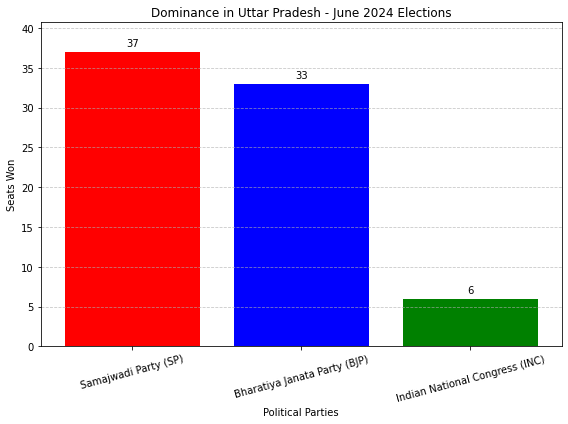

In [97]:
import matplotlib.pyplot as plt

# Data based on the election results provided
party_names = ['Samajwadi Party (SP)', 'Bharatiya Janata Party (BJP)', 'Indian National Congress (INC)']
seats_won = [37, 33, 6]

# Plotting the data
plt.figure(figsize=(8, 6))
plt.bar(party_names, seats_won, color=['red', 'blue', 'green'])
plt.xlabel('Political Parties')
plt.ylabel('Seats Won')
plt.title('Dominance in Uttar Pradesh - June 2024 Elections')
plt.xticks(rotation=15)
plt.ylim(0, max(seats_won) * 1.1)  # To give some space above the highest bar
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding values on top of the bars
for i, v in enumerate(seats_won):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## : Hyderabad Constituency: Asaduddin Owaisi from All India Majlis-E-Ittehadul Muslimeen (AIMIM) won the Hyderabad seat with a significant margin of 661,981 votes​ (ECI Official)​.


In [98]:
import requests
from bs4 import BeautifulSoup

# Constituency codes for Telangana
constituency_codes_telangana = {
    "Adilabad - 1": "S291", "Bhongir - 14": "S2914", "Chevella - 10": "S2910", "Hyderabad - 9": "S299",
    "Karimnagar - 3": "S293", "Khammam - 17": "S2917", "Mahabubabad - 16": "S2916", "Mahbubnagar - 11": "S2911",
    "Malkajgiri - 7": "S297", "Medak - 6": "S296", "Nagarkurnool - 12": "S2912", "Nalgonda - 13": "S2913",
    "Nizamabad - 4": "S294", "Peddapalle - 2": "S292", "Secunderabad - 8": "S298", "Warangal - 15": "S2915",
    "Zahirabad - 5": "S295"
}

# Base URL for Telangana constituency results
base_url_telangana = "https://results.eci.gov.in/PcResultGenJune2024/Constituencywise"

# Function to scrape candidate-wise election results for Telangana constituencies
def scrape_candidate_results_telangana(constituency_code):
    # Construct the URL for the constituency
    constituency_url = f"{base_url_telangana}{constituency_code}.htm"
    
    # Make a GET request to the URL
    response = requests.get(constituency_url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract constituency name
        constituency_name = soup.select_one('title').text.strip().split('-')[0]
        
        # Extract table data
        table = soup.find('table', {'class': 'table table-striped table-bordered'})
        if table:
            rows = table.find_all('tr')
            results = []
            for row in rows[1:-1]:  # skip header and footer rows
                cols = row.find_all('td')
                if len(cols) >= 7:
                    candidate_name = cols[1].text.strip()
                    party_name = cols[2].text.strip()
                    evm_votes = cols[3].text.strip()
                    postal_votes = cols[4].text.strip()
                    total_votes = cols[5].text.strip()
                    percentage_votes = cols[6].text.strip()
                    
                    results.append({
                        'Candidate Name': candidate_name,
                        'Party': party_name,
                        'EVM Votes': evm_votes,
                        'Postal Votes': postal_votes,
                        'Total Votes': total_votes,
                        '% of Votes': percentage_votes
                    })
            
            return constituency_name, results
        else:
            print(f"No table found for {constituency_name}")
    else:
        print(f"Failed to fetch data from {constituency_url}, Status Code: {response.status_code}")

# Example usage:
for constituency_name, constituency_code in constituency_codes_telangana.items():
    print(f"Fetching results for {constituency_name} ({constituency_code})...")
    name, results = scrape_candidate_results_telangana(constituency_code)
    if results:
        print(f"Constituency Name: {name}")
        print("Results:")
        for result in results:
            print(result)
        print("\n")
    else:
        print(f"No results found for {constituency_name}\n")


Fetching results for Adilabad - 1 (S291)...
Constituency Name: Election Commission of India
Results:
{'Candidate Name': 'GODAM NAGESH', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '558936', 'Postal Votes': '9232', 'Total Votes': '568168', '% of Votes': '45.98'}
{'Candidate Name': 'ATHRAM SUGUNA', 'Party': 'Indian National Congress', 'EVM Votes': '472333', 'Postal Votes': '5183', 'Total Votes': '477516', '% of Votes': '38.65'}
{'Candidate Name': 'ATHRAM SAKKU', 'Party': 'Bharat Rashtra Samithi', 'EVM Votes': '136463', 'Postal Votes': '837', 'Total Votes': '137300', '% of Votes': '11.11'}
{'Candidate Name': 'MALOTHU SYAMLAL NAYAK', 'Party': 'Alliance of Democratic Reforms Party', 'EVM Votes': '7489', 'Postal Votes': '10', 'Total Votes': '7499', '% of Votes': '0.61'}
{'Candidate Name': 'MESRAM JANGUBAPU', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '6689', 'Postal Votes': '55', 'Total Votes': '6744', '% of Votes': '0.55'}
{'Candidate Name': 'RATHOD SUBASH', 'Party': 'Independent', 'E

Constituency Name: Election Commission of India
Results:
{'Candidate Name': 'KONDA VISHWESHWAR REDDY', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '798517', 'Postal Votes': '11365', 'Total Votes': '809882', '% of Votes': '48.34'}
{'Candidate Name': 'DR GADDAM RANJITH REDDY', 'Party': 'Indian National Congress', 'EVM Votes': '630861', 'Postal Votes': '6124', 'Total Votes': '636985', '% of Votes': '38.02'}
{'Candidate Name': 'KASANI GYANESHWAR KASANI', 'Party': 'Bharat Rashtra Samithi', 'EVM Votes': '177540', 'Postal Votes': '1428', 'Total Votes': '178968', '% of Votes': '10.68'}
{'Candidate Name': 'RAMULU BINGI', 'Party': 'Yuga Thulasi Party', 'EVM Votes': '4281', 'Postal Votes': '3', 'Total Votes': '4284', '% of Votes': '0.26'}
{'Candidate Name': 'KONDA VISHVESHWAR REDDY', 'Party': 'All India Forward Bloc', 'EVM Votes': '3736', 'Postal Votes': '12', 'Total Votes': '3748', '% of Votes': '0.22'}
{'Candidate Name': 'SRIDEVI M', 'Party': 'Alliance of Democratic Reforms Party', 'EVM Vot

Constituency Name: Election Commission of India
Results:
{'Candidate Name': 'BANDI SANJAY KUMAR', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '578827', 'Postal Votes': '6289', 'Total Votes': '585116', '% of Votes': '44.57'}
{'Candidate Name': 'VELCHALA RAJENDER RAO', 'Party': 'Indian National Congress', 'EVM Votes': '357446', 'Postal Votes': '2461', 'Total Votes': '359907', '% of Votes': '27.41'}
{'Candidate Name': 'VINOD KUMAR BOIANAPALLI', 'Party': 'Bharat Rashtra Samithi', 'EVM Votes': '280867', 'Postal Votes': '1296', 'Total Votes': '282163', '% of Votes': '21.49'}
{'Candidate Name': 'ABBADI BUCHI REDDY', 'Party': 'Independent', 'EVM Votes': '11602', 'Postal Votes': '10', 'Total Votes': '11612', '% of Votes': '0.88'}
{'Candidate Name': 'ARUNA THALLAPALLY', 'Party': 'Alliance of Democratic Reforms Party', 'EVM Votes': '9043', 'Postal Votes': '21', 'Total Votes': '9064', '% of Votes': '0.69'}
{'Candidate Name': 'KOTA SHYAM KUMAR', 'Party': 'Independent', 'EVM Votes': '8744', 'Pos

Constituency Name: Election Commission of India
Results:
{'Candidate Name': 'BALRAM NAIK PORIKA', 'Party': 'Indian National Congress', 'EVM Votes': '608505', 'Postal Votes': '4269', 'Total Votes': '612774', '% of Votes': '55.27'}
{'Candidate Name': 'KAVITHA MALOTH', 'Party': 'Bharat Rashtra Samithi', 'EVM Votes': '262416', 'Postal Votes': '1193', 'Total Votes': '263609', '% of Votes': '23.77'}
{'Candidate Name': 'PROFESSOR. AZMEERA SEETARAM NAIK', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '108775', 'Postal Votes': '1669', 'Total Votes': '110444', '% of Votes': '9.96'}
{'Candidate Name': 'ARUN KUMAR MYPATHI', 'Party': 'All India Forward Bloc', 'EVM Votes': '38252', 'Postal Votes': '884', 'Total Votes': '39136', '% of Votes': '3.53'}
{'Candidate Name': 'RAGHU VARMA JATOTHU', 'Party': 'Alliance of Democratic Reforms Party', 'EVM Votes': '11879', 'Postal Votes': '14', 'Total Votes': '11893', '% of Votes': '1.07'}
{'Candidate Name': 'DURGA PALVANCHA', 'Party': 'Independent', 'EVM Vote

Constituency Name: Election Commission of India
Results:
{'Candidate Name': 'EATALA RAJENDER', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '980712', 'Postal Votes': '10330', 'Total Votes': '991042', '% of Votes': '51.25'}
{'Candidate Name': 'PATNAM SUNEETHA MAHENDER REDDY', 'Party': 'Indian National Congress', 'EVM Votes': '593337', 'Postal Votes': '6230', 'Total Votes': '599567', '% of Votes': '31'}
{'Candidate Name': 'RAGIDI LAXMA REDDY', 'Party': 'Bharat Rashtra Samithi', 'EVM Votes': '298697', 'Postal Votes': '1789', 'Total Votes': '300486', '% of Votes': '15.54'}
{'Candidate Name': 'THALLADA VENKATESWARLU', 'Party': 'Independent', 'EVM Votes': '6784', 'Postal Votes': '16', 'Total Votes': '6800', '% of Votes': '0.35'}
{'Candidate Name': 'ANITHA REDDY SHEELAM', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '4718', 'Postal Votes': '61', 'Total Votes': '4779', '% of Votes': '0.25'}
{'Candidate Name': 'VAISHNAVI PRASAD', 'Party': 'Independent', 'EVM Votes': '1894', 'Postal Votes': '

Constituency Name: Election Commission of India
Results:
{'Candidate Name': 'DR.MALLU RAVI', 'Party': 'Indian National Congress', 'EVM Votes': '459259', 'Postal Votes': '5813', 'Total Votes': '465072', '% of Votes': '38.14'}
{'Candidate Name': 'BHARATH  PRASAD POTHUGANTI', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '364898', 'Postal Votes': '5760', 'Total Votes': '370658', '% of Votes': '30.4'}
{'Candidate Name': 'DR.R.S.PRAVEEN KUMAR', 'Party': 'Bharat Rashtra Samithi', 'EVM Votes': '319216', 'Postal Votes': '2127', 'Total Votes': '321343', '% of Votes': '26.36'}
{'Candidate Name': 'AMBOJU RAVI', 'Party': 'Alliance of Democratic Reforms Party', 'EVM Votes': '12544', 'Postal Votes': '10', 'Total Votes': '12554', '% of Votes': '1.03'}
{'Candidate Name': 'BESAMOLLA  YOSEF', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '7138', 'Postal Votes': '80', 'Total Votes': '7218', '% of Votes': '0.59'}
{'Candidate Name': 'PILLELA SRIKANTH', 'Party': 'Independent', 'EVM Votes': '6403', 'Postal 

Constituency Name: Election Commission of India
Results:
{'Candidate Name': 'VAMSI KRISHNA GADDAM', 'Party': 'Indian National Congress', 'EVM Votes': '470180', 'Postal Votes': '5407', 'Total Votes': '475587', '% of Votes': '43.42'}
{'Candidate Name': 'SRINIVAS GOMASE', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '339107', 'Postal Votes': '5116', 'Total Votes': '344223', '% of Votes': '31.43'}
{'Candidate Name': 'ESHWAR KOPPULA', 'Party': 'Bharat Rashtra Samithi', 'EVM Votes': '191891', 'Postal Votes': '1465', 'Total Votes': '193356', '% of Votes': '17.65'}
{'Candidate Name': 'ERUKULLA RAJA NARSAIAH', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '6730', 'Postal Votes': '69', 'Total Votes': '6799', '% of Votes': '0.62'}
{'Candidate Name': 'VENUGOPAL MOYYI', 'Party': 'Bahujan Mukti Party', 'EVM Votes': '5220', 'Postal Votes': '3', 'Total Votes': '5223', '% of Votes': '0.48'}
{'Candidate Name': 'MOTHE NARESH', 'Party': 'Peoples Party of India (Democratic)', 'EVM Votes': '4998', 'Postal

Constituency Name: Election Commission of India
Results:
{'Candidate Name': 'KADIYAM KAVYA', 'Party': 'Indian National Congress', 'EVM Votes': '575566', 'Postal Votes': '5728', 'Total Votes': '581294', '% of Votes': '45.85'}
{'Candidate Name': 'AROORI RAMESH', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '355875', 'Postal Votes': '5080', 'Total Votes': '360955', '% of Votes': '28.47'}
{'Candidate Name': 'Dr. MARAPALLY SUDHEER KUMAR', 'Party': 'Bharat Rashtra Samithi', 'EVM Votes': '230820', 'Postal Votes': '1213', 'Total Votes': '232033', '% of Votes': '18.3'}
{'Candidate Name': 'AMBOJU BUDDAIAH', 'Party': 'Alliance of Democratic Reforms Party', 'EVM Votes': '11103', 'Postal Votes': '12', 'Total Votes': '11115', '% of Votes': '0.88'}
{'Candidate Name': 'KALPANA PANJA', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '9230', 'Postal Votes': '97', 'Total Votes': '9327', '% of Votes': '0.74'}
{'Candidate Name': 'KONGARA ANIL KUMAR', 'Party': 'Independent', 'EVM Votes': '6259', 'Postal Vot

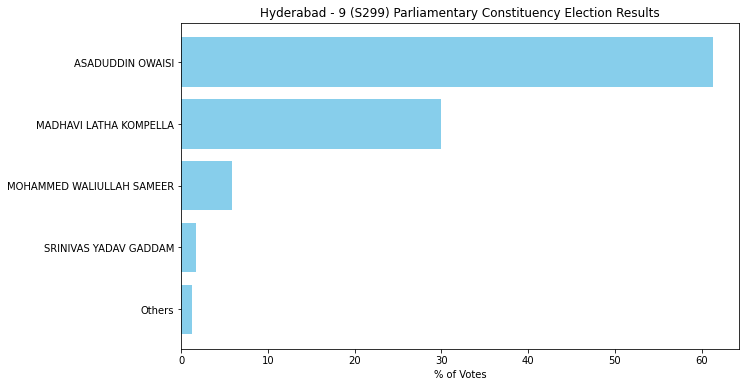

In [99]:
import matplotlib.pyplot as plt

# Data from the scraped results
candidates = [
    {'Candidate Name': 'ASADUDDIN OWAISI', 'Party': 'AIMIM', 'Percentage': 61.28},
    {'Candidate Name': 'MADHAVI LATHA KOMPELLA', 'Party': 'BJP', 'Percentage': 29.98},
    {'Candidate Name': 'MOHAMMED WALIULLAH SAMEER', 'Party': 'INC', 'Percentage': 5.83},
    {'Candidate Name': 'SRINIVAS YADAV GADDAM', 'Party': 'TRS', 'Percentage': 1.73},
    {'Candidate Name': 'Others', 'Party': '', 'Percentage': 1.18}
]

# Extract candidate names and their percentages
candidate_names = [candidate['Candidate Name'] for candidate in candidates]
percentages = [candidate['Percentage'] for candidate in candidates]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(candidate_names, percentages, color='skyblue')
plt.xlabel('% of Votes')
plt.title('Hyderabad - 9 (S299) Parliamentary Constituency Election Results')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.show()


## : Close Contest in Maharashtra's Akola: In Akola, Maharashtra, the BJP candidate Anup Sanjay Dhotre won with 457,030 votes, closely followed by the INC candidate Abhay Kashinath Patil with 416,404 votes​ (ECI Official)​.


In [100]:
import requests
from bs4 import BeautifulSoup

# Constituency codes for Maharashtra
constituency_codes_maharashtra = {
    "Ahmednagar - 37": "S1337", "Akola - 6": "S136", "Amravati - 7": "S137", "Aurangabad - 19": "S1319",
    "Baramati - 35": "S1335", "Beed - 39": "S1339", "Bhandara Gondiya - 11": "S1311", "Bhiwandi - 23": "S1323",
    "Buldhana - 5": "S135", "Chandrapur - 13": "S1313", "Dhule - 2": "S132", "Dindori - 20": "S1320",
    "Gadchiroli - Chimur - 12": "S1312", "Hatkanangale - 48": "S1348", "Hingoli - 15": "S1315", "Jalgaon - 3": "S133",
    "Jalna - 18": "S1318", "Kalyan - 24": "S1324", "Kolhapur - 47": "S1347", "Latur - 41": "S1341",
    "Madha - 43": "S1343", "Maval - 33": "S1333", "Mumbai North - 26": "S1326", "Mumbai North Central - 29": "S1329",
    "Mumbai North East - 28": "S1328", "Mumbai North West - 27": "S1327", "Mumbai South - 31": "S1331",
    "Mumbai South Central - 30": "S1330", "Nagpur - 10": "S1310", "Nanded - 16": "S1316", "Nandurbar - 1": "S131",
    "Nashik - 21": "S1321", "Osmanabad - 40": "S1340", "Palghar - 22": "S1322", "Parbhani - 17": "S1317",
    "Pune - 34": "S1334", "Raigad - 32": "S1332", "Ramtek - 9": "S139", "Ratnagiri- Sindhudurg - 46": "S1346",
    "Raver - 4": "S134", "Sangli - 44": "S1344", "Satara - 45": "S1345", "Shirdi - 38": "S1338", "Shirur - 36": "S1336",
    "Solapur - 42": "S1342", "Thane - 25": "S1325", "Wardha - 8": "S138", "Yavatmal- Washim - 14": "S1314"
}

# Base URL for Maharashtra constituency results
base_url_maharashtra = "https://results.eci.gov.in/PcResultGenJune2024/Constituencywise"

# Function to scrape candidate-wise election results for Maharashtra constituencies
def scrape_candidate_results_maharashtra(constituency_code):
    # Construct the URL for the constituency
    constituency_url = f"{base_url_maharashtra}{constituency_code}.htm"
    
    # Make a GET request to the URL
    response = requests.get(constituency_url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract constituency name and state name
        title_element = soup.find('h2')
        if title_element:
            title_text = title_element.text.strip()
            parts = title_text.split('(')
            constituency_name = parts[0].strip()
            state_name = parts[1].split(')')[0].strip()
        else:
            constituency_name = "Unknown"
            state_name = "Unknown"
        
        # Extract table data
        table = soup.find('table', {'class': 'table table-striped table-bordered'})
        if table:
            rows = table.find_all('tr')
            results = []
            for row in rows[1:-1]:  # skip header and footer rows
                cols = row.find_all('td')
                if len(cols) >= 7:
                    candidate_name = cols[1].text.strip()
                    party_name = cols[2].text.strip()
                    evm_votes = cols[3].text.strip()
                    postal_votes = cols[4].text.strip()
                    total_votes = cols[5].text.strip()
                    percentage_votes = cols[6].text.strip()
                    
                    results.append({
                        'Candidate Name': candidate_name,
                        'Party': party_name,
                        'EVM Votes': evm_votes,
                        'Postal Votes': postal_votes,
                        'Total Votes': total_votes,
                        '% of Votes': percentage_votes
                    })
            
            return state_name, constituency_name, results
        else:
            print(f"No table found for {constituency_name}")
    else:
        print(f"Failed to fetch data from {constituency_url}, Status Code: {response.status_code}")

# Example usage:
for constituency_name, constituency_code in constituency_codes_maharashtra.items():
    print(f"Fetching results for {constituency_name} ({constituency_code})...")
    state_name, name, results = scrape_candidate_results_maharashtra(constituency_code)
    if results:
        print(f"State Name: {state_name}, Constituency Name: {name}")
        print("Results:")
        for result in results:
            print(result)
        print("\n")
    else:
        print(f"No results found for {constituency_name}\n")


Fetching results for Ahmednagar - 37 (S1337)...
State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  37 - Ahmednagar
Results:
{'Candidate Name': 'NILESH DNYANDEV LANKE', 'Party': 'Nationalist Congress Party – Sharadchandra Pawar', 'EVM Votes': '622144', 'Postal Votes': '2653', 'Total Votes': '624797', '% of Votes': '47.14'}
{'Candidate Name': 'DR. SUJAY RADHAKRISHNA VIKHEPATIL', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '593568', 'Postal Votes': '2300', 'Total Votes': '595868', '% of Votes': '44.95'}
{'Candidate Name': 'ALEKAR GORAKH DASHRATH', 'Party': 'Independent', 'EVM Votes': '44582', 'Postal Votes': '15', 'Total Votes': '44597', '% of Votes': '3.36'}
{'Candidate Name': 'DEELIP KONDIBA KHEDKAR', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '13689', 'Postal Votes': '60', 'Total Votes': '13749', '% of Votes': '1.04'}
{'Candidate Name': 'AMOL VILAS PACHUNDKAR', 'Party': 'Independent', 'EVM Votes': '5491', 'Postal Votes': '2', 'Total Votes': '5493', '% o

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  19 - Aurangabad
Results:
{'Candidate Name': 'BHUMARE SANDIPANRAO ASARAM', 'Party': 'Shiv Sena', 'EVM Votes': '474434', 'Postal Votes': '1696', 'Total Votes': '476130', '% of Votes': '36.56'}
{'Candidate Name': 'IMTIAZ JALEEL SYED', 'Party': 'All India Majlis-E-Ittehadul Muslimeen', 'EVM Votes': '340877', 'Postal Votes': '603', 'Total Votes': '341480', '% of Votes': '26.22'}
{'Candidate Name': 'CHANDRAKANT KHAIRE', 'Party': 'Shiv Sena (Uddhav Balasaheb Thackrey)', 'EVM Votes': '291870', 'Postal Votes': '1580', 'Total Votes': '293450', '% of Votes': '22.53'}
{'Candidate Name': 'AFSAR KHAN YASEEN KHA', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '69087', 'Postal Votes': '179', 'Total Votes': '69266', '% of Votes': '5.32'}
{'Candidate Name': 'HARSHWARDHAN DADA RAIBHANJI JADHAV', 'Party': 'Independent', 'EVM Votes': '39654', 'Postal Votes': '174', 'Total Votes': '39828', '% of Votes': '3.06'}
{'Candidate Name': '

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  39 - Beed
Results:
{'Candidate Name': 'BAJRANG MANOHAR SONWANE', 'Party': 'Nationalist Congress Party – Sharadchandra Pawar', 'EVM Votes': '682532', 'Postal Votes': '1418', 'Total Votes': '683950', '% of Votes': '44.93'}
{'Candidate Name': 'PANKAJA GOPINATHRAO MUNDE', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '675349', 'Postal Votes': '2048', 'Total Votes': '677397', '% of Votes': '44.5'}
{'Candidate Name': 'ASHOK BHAGOJI THORAT', 'Party': 'Bahujan Maha Party', 'EVM Votes': '54829', 'Postal Votes': '21', 'Total Votes': '54850', '% of Votes': '3.6'}
{'Candidate Name': 'ASHOK SUKHDEV HINGE', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '50741', 'Postal Votes': '126', 'Total Votes': '50867', '% of Votes': '3.34'}
{'Candidate Name': 'SHAIKH TOUSIF ABDUL SATTAR', 'Party': 'Independent', 'EVM Votes': '9472', 'Postal Votes': '-', 'Total Votes': '9472', '% of Votes': '0.62'}
{'Candidate Name': 'DR. SIDDHARTH RA

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  23 - Bhiwandi
Results:
{'Candidate Name': 'BALYA MAMA - SURESH GOPINATH MHATRE', 'Party': 'Nationalist Congress Party – Sharadchandra Pawar', 'EVM Votes': '498199', 'Postal Votes': '1265', 'Total Votes': '499464', '% of Votes': '39.85'}
{'Candidate Name': 'KAPIL MORESHWAR PATIL', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '431907', 'Postal Votes': '1436', 'Total Votes': '433343', '% of Votes': '34.57'}
{'Candidate Name': 'NILESH BHAGWAN SAMBARE', 'Party': 'Independent', 'EVM Votes': '230254', 'Postal Votes': '1163', 'Total Votes': '231417', '% of Votes': '18.46'}
{'Candidate Name': 'KANCHAN VINAYAK VAKHARE', 'Party': 'New Rashtriya Samaj Party', 'EVM Votes': '24607', 'Postal Votes': '18', 'Total Votes': '24625', '% of Votes': '1.96'}
{'Candidate Name': 'TARA PINTYA WAGHE', 'Party': 'Independent', 'EVM Votes': '6908', 'Postal Votes': '-', 'Total Votes': '6908', '% of Votes': '0.55'}
{'Candidate Name': 'MUMATAZ

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  13 - Chandrapur
Results:
{'Candidate Name': 'DHANORKAR PRATIBHA SURESH ALIAS BALUBHAU', 'Party': 'Indian National Congress', 'EVM Votes': '716635', 'Postal Votes': '1775', 'Total Votes': '718410', '% of Votes': '57.88'}
{'Candidate Name': 'MUNGANTIWAR SUDHIR SACCHIDANAND', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '456943', 'Postal Votes': '1061', 'Total Votes': '458004', '% of Votes': '36.9'}
{'Candidate Name': 'BELE RAJESH WARLUJI', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '21934', 'Postal Votes': '46', 'Total Votes': '21980', '% of Votes': '1.77'}
{'Candidate Name': 'RAJENDRA HARISHCHANDRA RAMTEKE', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '9145', 'Postal Votes': '43', 'Total Votes': '9188', '% of Votes': '0.74'}
{'Candidate Name': 'SANJAY NILKANTH GAWANDE', 'Party': 'Independent', 'EVM Votes': '5087', 'Postal Votes': '1', 'Total Votes': '5088', '% of Votes': '0.41'}
{'Candidate Name': 'DIWAK

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  48 - Hatkanangale
Results:
{'Candidate Name': 'DHAIRYASHEEL SAMBHAJIRAO MANE', 'Party': 'Shiv Sena', 'EVM Votes': '518334', 'Postal Votes': '1856', 'Total Votes': '520190', '% of Votes': '40.14'}
{'Candidate Name': 'SATYAJEET BABASAHEB PATIL (AABA) SARUDKAR', 'Party': 'Shiv Sena (Uddhav Balasaheb Thackrey)', 'EVM Votes': '504181', 'Postal Votes': '2583', 'Total Votes': '506764', '% of Votes': '39.1'}
{'Candidate Name': 'RAJU SHETTI', 'Party': 'Swabhimani Paksha', 'EVM Votes': '178866', 'Postal Votes': '984', 'Total Votes': '179850', '% of Votes': '13.88'}
{'Candidate Name': 'D. C. PATIL DADASAHEB / DADGONDA CHAVGONDA PATIL', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '32591', 'Postal Votes': '105', 'Total Votes': '32696', '% of Votes': '2.52'}
{'Candidate Name': 'ASLAM AINODIN MULLA', 'Party': 'Independent', 'EVM Votes': '6107', 'Postal Votes': '4', 'Total Votes': '6111', '% of Votes': '0.47'}
{'Candidate N

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  3 - Jalgaon
Results:
{'Candidate Name': 'SMITA UDAY WAGH', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '672119', 'Postal Votes': '2309', 'Total Votes': '674428', '% of Votes': '57.67'}
{'Candidate Name': 'KARAN BALASAHEB PATIL - PAWAR', 'Party': 'Shiv Sena (Uddhav Balasaheb Thackrey)', 'EVM Votes': '421213', 'Postal Votes': '1621', 'Total Votes': '422834', '% of Votes': '36.15'}
{'Candidate Name': 'YUVRAJ JADHAV (SAMBHA AAPPA)', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '21062', 'Postal Votes': '115', 'Total Votes': '21177', '% of Votes': '1.81'}
{'Candidate Name': 'EX-HAVILDAR ISHWAR DAYARAM MORE', 'Party': 'Sainik Samaj Party', 'EVM Votes': '7479', 'Postal Votes': '69', 'Total Votes': '7548', '% of Votes': '0.65'}
{'Candidate Name': 'VILAS SHANKAR TAYADE', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '6310', 'Postal Votes': '71', 'Total Votes': '6381', '% of Votes': '0.55'}
{'Candidate Name': 'LALIT 

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  47 - Kolhapur
Results:
{'Candidate Name': 'CHHATRAPATI SHAHU SHAHAJI', 'Party': 'Indian National Congress', 'EVM Votes': '750323', 'Postal Votes': '4199', 'Total Votes': '754522', '% of Votes': '54.15'}
{'Candidate Name': 'SANJAY SADASHIVRAO MANDLIK', 'Party': 'Shiv Sena', 'EVM Votes': '597014', 'Postal Votes': '2544', 'Total Votes': '599558', '% of Votes': '43.03'}
{'Candidate Name': 'SANJAY BHIKAJI MAGADE', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '3946', 'Postal Votes': '56', 'Total Votes': '4002', '% of Votes': '0.29'}
{'Candidate Name': 'MUSHTAK AJIJ MULLA', 'Party': 'Independent', 'EVM Votes': '3822', 'Postal Votes': '2', 'Total Votes': '3824', '% of Votes': '0.27'}
{'Candidate Name': 'MADHURI RAJU JADHAV', 'Party': 'Independent', 'EVM Votes': '3503', 'Postal Votes': '5', 'Total Votes': '3508', '% of Votes': '0.25'}
{'Candidate Name': 'KHADE BAJIRAO NANASO', 'Party': 'Independent', 'EVM Votes': '3497', '

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  43 - Madha
Results:
{'Candidate Name': 'MOHITE-PATIL DHAIRYASHEEL RAJSINH', 'Party': 'Nationalist Congress Party – Sharadchandra Pawar', 'EVM Votes': '618566', 'Postal Votes': '3647', 'Total Votes': '622213', '% of Votes': '48.86'}
{'Candidate Name': 'RANJEETSINGH HINDURAO NAIK NIMBALKAR', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '499171', 'Postal Votes': '2205', 'Total Votes': '501376', '% of Votes': '39.37'}
{'Candidate Name': 'ER. RAMCHANDRA MAYAPPA GHUTUKADE', 'Party': 'New Rashtriya Samaj Party', 'EVM Votes': '58344', 'Postal Votes': '77', 'Total Votes': '58421', '% of Votes': '4.59'}
{'Candidate Name': 'BARASKAR RAMESH NAGNATH', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '20519', 'Postal Votes': '85', 'Total Votes': '20604', '% of Votes': '1.62'}
{'Candidate Name': 'JANKAR SWARUP DADA', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '7036', 'Postal Votes': '58', 'Total Votes': '7094', '% of Votes

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  26 - Mumbai North
Results:
{'Candidate Name': 'PIYUSH GOYAL', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '678451', 'Postal Votes': '1695', 'Total Votes': '680146', '% of Votes': '65.68'}
{'Candidate Name': 'BHUSHAN PATIL', 'Party': 'Indian National Congress', 'EVM Votes': '321455', 'Postal Votes': '1083', 'Total Votes': '322538', '% of Votes': '31.15'}
{'Candidate Name': 'ADV. SONAL DIWAKAR GONDANE', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '6007', 'Postal Votes': '45', 'Total Votes': '6052', '% of Votes': '0.58'}
{'Candidate Name': 'RAIS DOCTOR', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '2907', 'Postal Votes': '16', 'Total Votes': '2923', '% of Votes': '0.28'}
{'Candidate Name': 'PANDEY DHARMENDRA RAMMURAT', 'Party': 'Independent', 'EVM Votes': '1481', 'Postal Votes': '-', 'Total Votes': '1481', '% of Votes': '0.14'}
{'Candidate Name': 'DIPTI ASHOK WALAWALKAR', 'Party': 'Independent', 'EVM Votes

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  27 - Mumbai North West
Results:
{'Candidate Name': 'AMOL GAJANAN KIRTIKAR', 'Party': 'Shiv Sena (Uddhav Balasaheb Thackrey)', 'EVM Votes': '451095', 'Postal Votes': '1501', 'Total Votes': '452596', '% of Votes': '47.4'}
{'Candidate Name': 'RAVINDRA DATTARAM WAIKAR', 'Party': 'Shiv Sena', 'EVM Votes': '451094', 'Postal Votes': '1550', 'Total Votes': '452644', '% of Votes': '47.4'}
{'Candidate Name': 'PARMESHWAR ASHOK RANSHUR', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '10001', 'Postal Votes': '51', 'Total Votes': '10052', '% of Votes': '1.05'}
{'Candidate Name': 'RAJESH RAMKISAN MALLAH', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '4790', 'Postal Votes': '22', 'Total Votes': '4812', '% of Votes': '0.5'}
{'Candidate Name': 'SAMEER MORE', 'Party': 'Independent', 'EVM Votes': '3171', 'Postal Votes': '2', 'Total Votes': '3173', '% of Votes': '0.33'}
{'Candidate Name': 'SUNIL BHIMA CHAVAN', 'Party': 'Independen

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  10 - Nagpur
Results:
{'Candidate Name': 'NITIN JAIRAM GADKARI', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '652809', 'Postal Votes': '2218', 'Total Votes': '655027', '% of Votes': '54.08'}
{'Candidate Name': 'VIKAS THAKRE', 'Party': 'Indian National Congress', 'EVM Votes': '515941', 'Postal Votes': '1483', 'Total Votes': '517424', '% of Votes': '42.72'}
{'Candidate Name': 'YOGIRAJ ALIAS YOGESH PATIRAM LANJEWAR', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '19164', 'Postal Votes': '78', 'Total Votes': '19242', '% of Votes': '1.59'}
{'Candidate Name': 'KIVINSUKA VIRENDRA SURYAVANSHI', 'Party': 'Desh Janhit Party', 'EVM Votes': '2055', 'Postal Votes': '4', 'Total Votes': '2059', '% of Votes': '0.17'}
{'Candidate Name': 'ADARSH RAVISHANKAR THAKUR', 'Party': 'Independent', 'EVM Votes': '1749', 'Postal Votes': '1', 'Total Votes': '1750', '% of Votes': '0.14'}
{'Candidate Name': 'ADV ULHAS SHALIKRAM DUPARE', 'Party

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  1 - Nandurbar
Results:
{'Candidate Name': 'ADV GOWAAL KAGADA PADAVI', 'Party': 'Indian National Congress', 'EVM Votes': '744879', 'Postal Votes': '1119', 'Total Votes': '745998', '% of Votes': '53.53'}
{'Candidate Name': 'DR HEENA VIJAYKUMAR GAVIT', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '585847', 'Postal Votes': '1031', 'Total Votes': '586878', '% of Votes': '42.11'}
{'Candidate Name': 'ANANDA SUKALAL KOLI', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '10628', 'Postal Votes': '16', 'Total Votes': '10644', '% of Votes': '0.76'}
{'Candidate Name': 'SUSHILKUMAR JAHANGIR PAWARA', 'Party': 'Independent', 'EVM Votes': '8878', 'Postal Votes': '9', 'Total Votes': '8887', '% of Votes': '0.64'}
{'Candidate Name': 'NIRMALA VASAVE', 'Party': 'Peoples Party of India (Democratic)', 'EVM Votes': '6923', 'Postal Votes': '24', 'Total Votes': '6947', '% of Votes': '0.5'}
{'Candidate Name': 'ROHIDAS GEMAJI VALVI', 'Party'

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  22 - Palghar
Results:
{'Candidate Name': 'DR. HEMANT VISHNU SAVARA', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '600208', 'Postal Votes': '1036', 'Total Votes': '601244', '% of Votes': '43.69'}
{'Candidate Name': 'BHARTI BHARAT KAMDI', 'Party': 'Shiv Sena (Uddhav Balasaheb Thackrey)', 'EVM Votes': '416822', 'Postal Votes': '1116', 'Total Votes': '417938', '% of Votes': '30.37'}
{'Candidate Name': 'RAJESH RAGHUNATH PATIL', 'Party': 'Bahujan Vikas Aaghadi', 'EVM Votes': '254011', 'Postal Votes': '506', 'Total Votes': '254517', '% of Votes': '18.5'}
{'Candidate Name': 'BHARAT SAMJI VANGA', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '15425', 'Postal Votes': '40', 'Total Votes': '15465', '% of Votes': '1.12'}
{'Candidate Name': 'MEENA KISHOR BHAD', 'Party': 'Independent', 'EVM Votes': '14223', 'Postal Votes': '12', 'Total Votes': '14235', '% of Votes': '1.03'}
{'Candidate Name': 'VIJAYA RAJKUMAR MHATRE', 'Party'

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  32 - Raigad
Results:
{'Candidate Name': 'TATKARE SUNIL DATTATREY', 'Party': 'Nationalist Congress Party', 'EVM Votes': '506529', 'Postal Votes': '1823', 'Total Votes': '508352', '% of Votes': '50.17'}
{'Candidate Name': 'ANANT GEETE', 'Party': 'Shiv Sena (Uddhav Balasaheb Thackrey)', 'EVM Votes': '423137', 'Postal Votes': '2431', 'Total Votes': '425568', '% of Votes': '42'}
{'Candidate Name': 'KUMUDINI RAVINDRA CHAVAN', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '19500', 'Postal Votes': '118', 'Total Votes': '19618', '% of Votes': '1.94'}
{'Candidate Name': 'SHRINIVAS SATYANARAYAN MATTAPARTI', 'Party': 'Independent', 'EVM Votes': '9379', 'Postal Votes': '15', 'Total Votes': '9394', '% of Votes': '0.93'}
{'Candidate Name': 'AMIT SHRIPAL KAWADE', 'Party': 'Independent', 'EVM Votes': '5603', 'Postal Votes': '31', 'Total Votes': '5634', '% of Votes': '0.56'}
{'Candidate Name': 'ANANT BALOJI GITE', 'Party': 'Ind

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  4 - Raver
Results:
{'Candidate Name': 'KHADSE RAKSHA NIKHIL', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '629558', 'Postal Votes': '1321', 'Total Votes': '630879', '% of Votes': '53.84'}
{'Candidate Name': 'SHRIRAM DAYARAM PATIL', 'Party': 'Nationalist Congress Party – Sharadchandra Pawar', 'EVM Votes': '358030', 'Postal Votes': '666', 'Total Votes': '358696', '% of Votes': '30.61'}
{'Candidate Name': 'ER. SANJAY PANDIT BRAMHANE', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '59001', 'Postal Votes': '119', 'Total Votes': '59120', '% of Votes': '5.05'}
{'Candidate Name': 'EKNATH NAGO SALUNKE', 'Party': 'Independent', 'EVM Votes': '43957', 'Postal Votes': '25', 'Total Votes': '43982', '% of Votes': '3.75'}
{'Candidate Name': 'GULAB DAYARAM BHIL', 'Party': 'Bharat Adivasi Party', 'EVM Votes': '9622', 'Postal Votes': '22', 'Total Votes': '9644', '% of Votes': '0.82'}
{'Candidate Name': 'MAMTA ALIAS MUMTAJ BH

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  38 - Shirdi
Results:
{'Candidate Name': 'BHAUSAHEB RAJARAM WAKCHAURE', 'Party': 'Shiv Sena (Uddhav Balasaheb Thackrey)', 'EVM Votes': '475637', 'Postal Votes': '1263', 'Total Votes': '476900', '% of Votes': '45'}
{'Candidate Name': 'LOKHANDE SADASHIV KISAN', 'Party': 'Shiv Sena', 'EVM Votes': '425498', 'Postal Votes': '873', 'Total Votes': '426371', '% of Votes': '40.23'}
{'Candidate Name': 'UTKARSHA PREMANAND RUPWATE', 'Party': 'Vanchit Bahujan  Aaghadi', 'EVM Votes': '90748', 'Postal Votes': '181', 'Total Votes': '90929', '% of Votes': '8.58'}
{'Candidate Name': 'BHAUSAHEB RAMNATH WAKCHAURE', 'Party': 'Independent', 'EVM Votes': '13973', 'Postal Votes': '33', 'Total Votes': '14006', '% of Votes': '1.32'}
{'Candidate Name': 'RAMCHANDRA NAMDEV JADHAV', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '7000', 'Postal Votes': '40', 'Total Votes': '7040', '% of Votes': '0.66'}
{'Candidate Name': 'RAVINDRA KALLAYYA SWAMY'

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  42 - Solapur
Results:
{'Candidate Name': 'PRANITI SUSHILKUMAR SHINDE', 'Party': 'Indian National Congress', 'EVM Votes': '618350', 'Postal Votes': '1875', 'Total Votes': '620225', '% of Votes': '51.49'}
{'Candidate Name': 'RAM VITTHAL SATPUTE', 'Party': 'Bharatiya Janata Party', 'EVM Votes': '544770', 'Postal Votes': '1258', 'Total Votes': '546028', '% of Votes': '45.33'}
{'Candidate Name': 'AATISH MOHAN BANSODE', 'Party': 'Independent', 'EVM Votes': '10493', 'Postal Votes': '14', 'Total Votes': '10507', '% of Votes': '0.87'}
{'Candidate Name': 'BABLU SIDRAM GAIKWAD', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '5236', 'Postal Votes': '32', 'Total Votes': '5268', '% of Votes': '0.44'}
{'Candidate Name': 'SHRIVIDYADURGADEVI MAULAPPA KURANE', 'Party': 'Independent', 'EVM Votes': '3489', 'Postal Votes': '4', 'Total Votes': '3493', '% of Votes': '0.29'}
{'Candidate Name': 'RAMESH BHIMRAO SHIKHARE', 'Party': 'Independ

State Name: Maharashtra, Constituency Name: Parliamentary  Constituency  14 - Yavatmal- Washim
Results:
{'Candidate Name': 'SANJAY UTTAMRAO DESHMUKH', 'Party': 'Shiv Sena (Uddhav Balasaheb Thackrey)', 'EVM Votes': '591899', 'Postal Votes': '2908', 'Total Votes': '594807', '% of Votes': '48.53'}
{'Candidate Name': 'RAJSHRITAI HEMANT PATIL (MAHALLE)', 'Party': 'Shiv Sena', 'EVM Votes': '498514', 'Postal Votes': '1820', 'Total Votes': '500334', '% of Votes': '40.83'}
{'Candidate Name': 'ANIL JAYRAM RATHOD', 'Party': 'Samnak Janta Party', 'EVM Votes': '56175', 'Postal Votes': '215', 'Total Votes': '56390', '% of Votes': '4.6'}
{'Candidate Name': 'HARISING (HARIBHAU) NASARU RATHOD', 'Party': 'Bahujan Samaj Party', 'EVM Votes': '17256', 'Postal Votes': '140', 'Total Votes': '17396', '% of Votes': '1.42'}
{'Candidate Name': 'SANGITA DINESH CHAVHAN', 'Party': 'Independent', 'EVM Votes': '7169', 'Postal Votes': '11', 'Total Votes': '7180', '% of Votes': '0.59'}
{'Candidate Name': 'RAMDAS BAJIRA

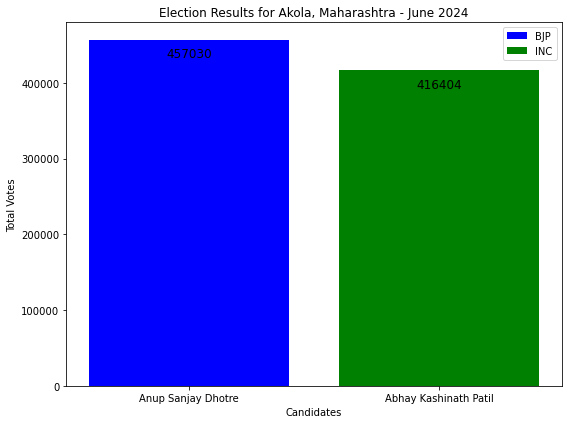

In [101]:
import matplotlib.pyplot as plt

# Data from scraping (example data)
candidates = ['Anup Sanjay Dhotre', 'Abhay Kashinath Patil']
parties = ['BJP', 'INC']
total_votes = [457030, 416404]

# Plotting the data
plt.figure(figsize=(8, 6))
bars = plt.bar(candidates, total_votes, color=['blue', 'green'])

# Adding labels and title
plt.xlabel('Candidates')
plt.ylabel('Total Votes')
plt.title('Election Results for Akola, Maharashtra - June 2024')

# Adding text labels for each bar
for bar, votes in zip(bars, total_votes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 10000, f'{votes}', ha='center', va='top', fontsize=12)

# Adding legend
plt.legend(bars, parties, loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


## : NOTA Votes from all States

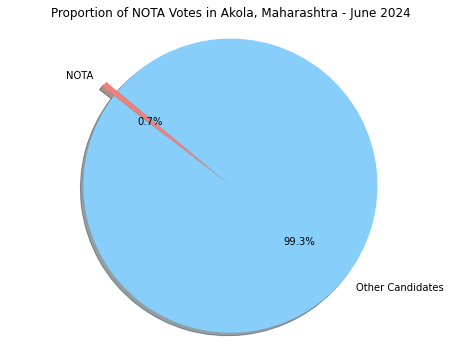

In [102]:
import matplotlib.pyplot as plt

# Example data (replace with actual scraped data)
total_votes_akola = 457030 + 416404  # Total votes for all candidates combined
nota_votes_akola = 5783  # Votes for NOTA

# Calculate percentage of votes for NOTA
percent_nota = (nota_votes_akola / total_votes_akola) * 100
percent_other_candidates = 100 - percent_nota

# Labels and sizes for the pie chart
labels = ['NOTA', 'Other Candidates']
sizes = [percent_nota, percent_other_candidates]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode NOTA slice

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Adding title
plt.title('Proportion of NOTA Votes in Akola, Maharashtra - June 2024')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## : Diverse Political Landscape: The results underscore the diverse political landscape of India, with different states showing varied political preferences, highlighting the complexity and plurality of Indian democracy.


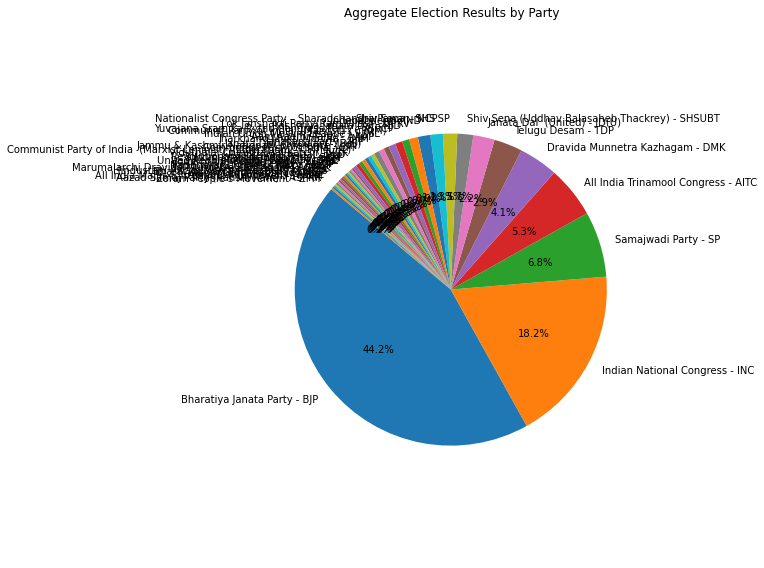

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the aggregated election results from the CSV file
final_results = pd.read_csv('election_results_2024_all_states_combined.csv')

# Aggregating results by party
party_votes = final_results.groupby('Party')['Won'].sum().sort_values(ascending=False)

# Plotting the aggregated results in a pie chart
plt.figure(figsize=(10, 8))
plt.pie(party_votes, labels=party_votes.index, autopct='%1.1f%%', startangle=140)
plt.title('Aggregate Election Results by Party')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


## Majority of TDP in Andhra Pradesh by margin of victory


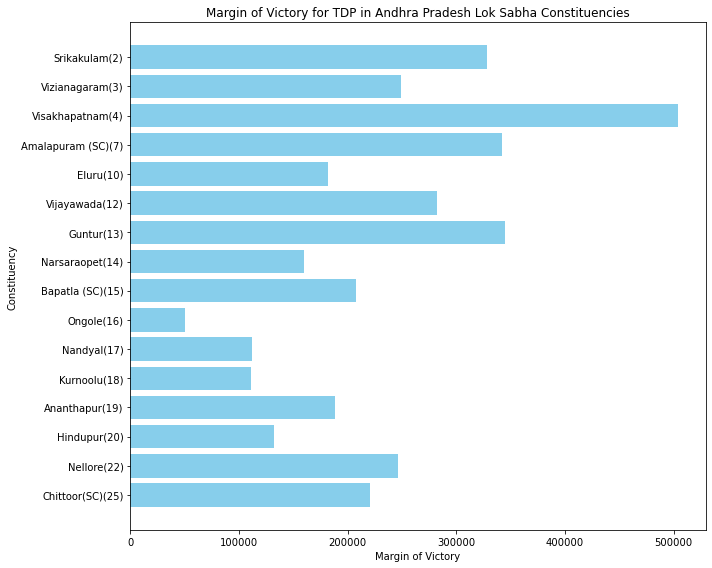

In [104]:
import matplotlib.pyplot as plt

# Constituencies and their margins (replace with actual data if available)
constituencies = [
    'Srikakulam(2)', 'Vizianagaram(3)', 'Visakhapatnam(4)', 'Amalapuram (SC)(7)',
    'Eluru(10)', 'Vijayawada(12)', 'Guntur(13)', 'Narsaraopet(14)',
    'Bapatla (SC)(15)', 'Ongole(16)', 'Nandyal(17)', 'Kurnoolu(18)',
    'Ananthapur(19)', 'Hindupur(20)', 'Nellore(22)', 'Chittoor(SC)(25)'
]
margins = [
    327901, 249351, 504247, 342196, 181857, 282085, 344695, 159729,
    208031, 50199, 111975, 111298, 188555, 132427, 245902, 220479
]

# Plotting the data
plt.figure(figsize=(10, 8))
plt.barh(constituencies, margins, color='skyblue')
plt.xlabel('Margin of Victory')
plt.ylabel('Constituency')
plt.title('Margin of Victory for TDP in Andhra Pradesh Lok Sabha Constituencies')
plt.gca().invert_yaxis()  # Invert y-axis to show constituency with highest margin on top
plt.tight_layout()
plt.show()
